# 1. Business Problem Description.

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# 2. Datasets Description.

In the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

In addition, I included the following datasets from Kaggle in `.extraData`:

* [Oscar Awards](https://www.kaggle.com/datasets/unanimad/the-oscar-award)
* [Golden Globe Awards](https://www.kaggle.com/datasets/unanimad/golden-globe-awards)
* [TMDB Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
* [IMDB Movies with Content Ratings](https://www.kaggle.com/datasets/shailx/imdb-movie-rating-dataset)


# 3. Proposed Analysis Steps

1. Outline general analysis approach.
2. Load all available data from multiple sources into pandas dataframes. Review data frames using "describe()" method.
3. Identify dataframes and columns we'll use for different analysis types. Review the proposed analysis approach in context of the data availability. For each dataframe perform cleaning for the variables of interest. Create a combined dataframe containing relevant variables. 
4. Perform EDA.
5. Narrow down choices and perform additional analysis on subsets.
6. Present our findings.

# 3. 1. General Analysis Approach.

Our main analysis will focus on how movie ROI is distibuted by genres and how variables like content rating,release date, or having criticaly acclaimed cast/crew affect the distribution.    


## 3.2. Data Loading.

We'll load up dataframes and extract info from the `.zippedData` directory.

In [364]:
import pandas as pd
import numpy as np
# linear regression libs

# sql libs
from pandasql import sqldf
import sqlite3 

# plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading databases
import os
import zipfile

In [365]:
# lists directory contents and unzippes files into subdirectory
def list_and_extract_files(dir_input):
    # List directory contents
    dir_files = [f for f in os.listdir(dir_input) if not f.startswith('.')]
    # Print the contents
    print('All files: \n', dir_files)
    
    dir_unzip = './unzipped'
    # Directory to extract the contents
    path_dir_source = os.path.join(dir_input)
    path_dir_dest = os.path.join(dir_input, 'unzipped')
    os.makedirs(path_dir_dest, exist_ok=True)
    contents_of_unzip_dir = os.listdir(path_dir_dest)

    # if already unzipped, skip
    files_zip = [f for f in os.listdir(path_dir_source) if f.endswith('.zip')]
    print('Zipped files: \n', files_zip)

    # unzip all files
    for f in files_zip:
        # name before zip
        base_name, extension = os.path.splitext(f)
        if (base_name not in contents_of_unzip_dir):
            # Open the zip file
            with zipfile.ZipFile(os.path.join(path_dir_source, f), 'r') as zip_ref:
                # Extract all contents to the specified directory
                zip_ref.extractall(path_dir_dest)
                print("zipped data ", f, " extracted successfully into", path_dir_dest)
    return path_dir_dest

In [366]:
# extracting base files
directory_base = './zippedData'
dir_extracted_base = list_and_extract_files(directory_base)

All files: 
 ['unzipped', 'tmdb.movies.csv.gz', 'im.db.zip', 'rt.reviews.tsv.gz', 'rt.movie_info.tsv.gz', 'tn.movie_budgets.csv.gz', 'bom.movie_gross.csv.gz']
Zipped files: 
 ['im.db.zip']


In [367]:
# load csv and tsv files into dataframes: tmdb
tmdb_df = pd.read_csv(os.path.join(directory_base, 'tmdb.movies.csv.gz'))
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [368]:
# rotten tomatoes reviews and info
rt_reviews_df = pd.read_csv(os.path.join(directory_base, 'rt.reviews.tsv.gz'), encoding='latin-1', sep='\t')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [369]:
rt_reviews_df.describe(include='all')

,id,review,rating,fresh,critic,top_critic,publisher,date
count,54432.000000,48869,40915,54432,51710,54432.000000,54123,54432
unique,NaN,48682,186,2,3496,NaN,1281,5963
top,NaN,Parental Content Review,3/5,fresh,Emanuel Levy,NaN,eFilmCritic.com,"January 1, 2000"
freq,NaN,24,4327,33035,595,NaN,673,4303
mean,1045.706882,NaN,NaN,NaN,NaN,0.240594,NaN,NaN
std,586.657046,NaN,NaN,NaN,NaN,0.427448,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,542.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1083.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1541.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [370]:
# rotten tomatoes reviews and info
rt_movie_info_df = pd.read_csv(os.path.join(directory_base, 'rt.movie_info.tsv.gz'), sep='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [371]:
rt_movie_info_df.describe(include = 'all')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
# movie budgets
movie_budgets_df = pd.read_csv(os.path.join(directory_base, 'tn.movie_budgets.csv.gz'))
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [373]:
movie_budgets_df.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [374]:
# movie box office
movie_box_df = pd.read_csv(os.path.join(directory_base, 'bom.movie_gross.csv.gz'))
movie_box_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [375]:
#path to imdb database
imdb_file = os.path.join(dir_extracted_base, 'im.db')

### 3.2.1. IMDB Database Structure

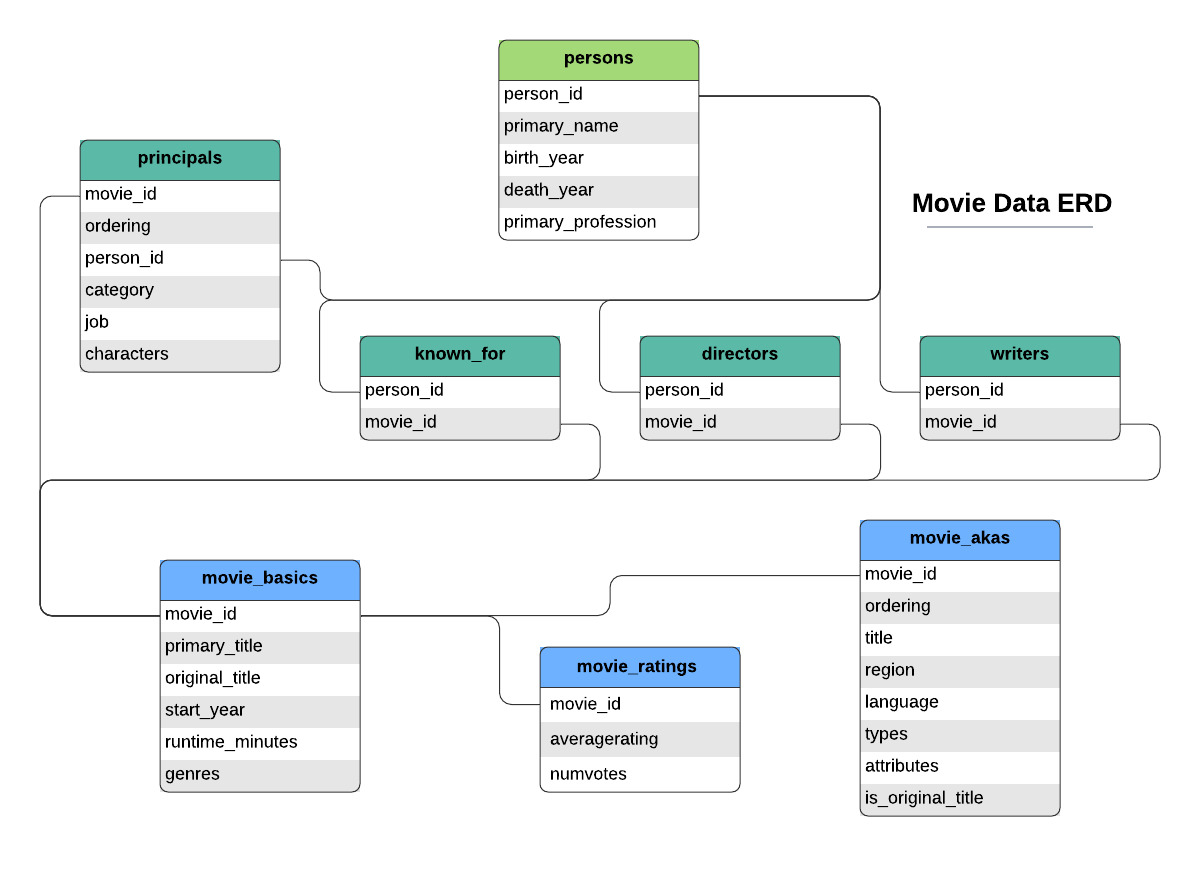

In [376]:
# use sqlite to extract info from movie_basics
conn = sqlite3.connect(imdb_file)
cur = conn.cursor()

movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
print(movie_basics.shape)
movie_basics.head()

(146144, 6)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [377]:
movie_basics.describe(include='all')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt7778748,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN


In [378]:
# load ratings table 
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [379]:
movie_ratings.describe(include = 'all')

,movie_id,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt2318503,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


In [380]:
#extra files
extra_directory = './extraData'
dir_extracted_extra = list_and_extract_files(directory_extra)

All files: 
 ['unzipped', 'golden_globe_awards.zip', 'tmdb_5000.zip', 'the_oscar_award.csv.zip']
Zipped files: 
 ['golden_globe_awards.zip', 'tmdb_5000.zip', 'the_oscar_award.csv.zip']
zipped data  golden_globe_awards.zip  extracted successfully into ./extraData/unzipped
zipped data  tmdb_5000.zip  extracted successfully into ./extraData/unzipped


In [381]:
oscars_df = pd.read_csv(os.path.join(dir_extracted_extra, 'golden_globe_awards.csv'))
oscars_df.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [382]:
golden_globes_df = pd.read_csv(os.path.join(dir_extracted_extra, 'the_oscar_award.csv'))
golden_globes_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [383]:
movies_meta_df = pd.read_csv(os.path.join(dir_extracted_extra, 'tmdb_5000_movies.csv'), low_memory=False)
movies_meta_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [384]:
movie_credits_df = pd.read_csv(os.path.join(dir_extracted_extra, 'tmdb_5000_credits.csv'), low_memory=False)
movie_credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [385]:
movie_content_rating_df = pd.read_csv(os.path.join(dir_extracted_extra, 'movie_metadata_with_R.csv'))
movie_content_rating_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 3.3. Review of DataFrames.

* For EDA, we're going to merge IMDB's movies with ratings and budget.
* For genre-specific analysis, we'll use TMDB combined with Oscar/GG.
* For Content Rating, we'll use content ratings dataframe filtered by top 10 genres. 

In [386]:
# merge imdb dataframes
imdb_movies_rated = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')
imdb_movies_rated.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### 3.3.2. Removing Duplicates From IMDB Dataframe. 

In [387]:
# Sort the number of votes in descending order
imdb_sorted_by_ratings = imdb_movies_rated.sort_values(by='numvotes', ascending=False)

# Drop duplicates in columns 'primary_title' and 'start_year', 
# keeping the first occurrence (largest number of votes)
imdb_unique = imdb_sorted_by_ratings.drop_duplicates(subset=['primary_title', 'start_year'], keep='first')

#filter y2k 
imdb_unique = imdb_unique[imdb_unique['start_year']>=2000]

#distribution of votes and runtime
print(imdb_unique['numvotes'].quantile([0.25, 0.5, 0.85]))
print(imdb_unique['runtime_minutes'].quantile([0.25, 0.5, 0.75]))
imdb_unique['runtime_minutes'].describe()

0.25     14.0
0.50     49.0
0.85    775.0
Name: numvotes, dtype: float64
0.25     81.0
0.50     91.0
0.75    104.0
Name: runtime_minutes, dtype: float64


count    65723.000000
mean        94.688070
std        209.377979
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [388]:
# max runtime value is 51420.000000, we need to cap movie duration at a reasonable length (say 4 hours)
max_runtime_min = 240;
imdb_unique = imdb_unique[imdb_unique['runtime_minutes']<max_runtime_min]

Setting boundary values for number of votes and for the duration: this will help us remove niche movies or shorts (supplimental movies).

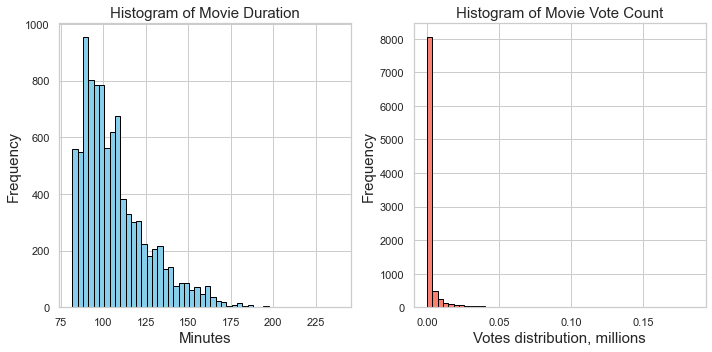

In [389]:
#filter by  number of votes
q85_votes = imdb_unique['numvotes'].quantile(0.85);
q25_runtime = imdb_unique['runtime_minutes'].quantile(0.25);
imdb_unique = imdb_unique[(imdb_unique['runtime_minutes'] > q25_runtime) & \
                          (imdb_unique['numvotes'] > q85_votes)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first histogram
axes[0].hist(imdb_unique['runtime_minutes'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Minutes', fontsize = 15)
axes[0].set_ylabel('Frequency', fontsize = 15)
axes[0].set_title('Histogram of Movie Duration', fontsize = 15)

# Plot the second histogram
axes[1].hist(imdb_unique['numvotes']/1e+07, bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Votes distribution, millions', fontsize = 15)
axes[1].set_ylabel('Frequency', fontsize = 15)
axes[1].set_title('Histogram of Movie Vote Count', fontsize = 15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [390]:
imdb_unique = imdb_unique[imdb_unique['start_year']>=2000]
cols_of_interest = ['primary_title', 'start_year', 'averagerating', 'numvotes', 'runtime_minutes', 'genres']
imdb_clean = imdb_unique[cols_of_interest].dropna().copy()

imdb_clean.rename(columns={'primary_title': 'title', 'start_year':'year', \
                           'averagerating':'avg_rating', 'numvotes':'total_votes', 
                          'runtime_minutes':'duration_min'}, \
                  inplace=True)
imdb_clean.describe()

,year,avg_rating,total_votes,duration_min
count,9344.000000,9344.000000,9.344000e+03,9344.000000
mean,2014.136879,6.259568,2.679522e+04,107.055758
std,2.555431,1.146198,8.140624e+04,19.496350
min,2010.000000,1.200000,9.470000e+02,82.000000
25%,2012.000000,5.600000,1.614750e+03,93.000000
50%,2014.000000,6.400000,3.462500e+03,102.000000
75%,2016.000000,7.100000,1.256450e+04,117.000000
max,2019.000000,9.700000,1.841066e+06,238.000000


Additional big cleanup/adjustment for the IMDB is genre splitting. We're going to split the genres into 3 columns:
genre_1 and genre_2. We then check the vote histogram distribution for the genres and filter out genres with lesser amount of votes. 

In [391]:
# See what we're dealing with.
set(imdb_clean.genres)

{'Action',
 'Action,Adventure',
 'Action,Adventure,Animation',
 'Action,Adventure,Biography',
 'Action,Adventure,Comedy',
 'Action,Adventure,Crime',
 'Action,Adventure,Documentary',
 'Action,Adventure,Drama',
 'Action,Adventure,Family',
 'Action,Adventure,Fantasy',
 'Action,Adventure,History',
 'Action,Adventure,Horror',
 'Action,Adventure,Mystery',
 'Action,Adventure,Romance',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Thriller',
 'Action,Adventure,Western',
 'Action,Animation',
 'Action,Animation,Comedy',
 'Action,Animation,Crime',
 'Action,Animation,Drama',
 'Action,Animation,Family',
 'Action,Animation,Fantasy',
 'Action,Animation,Horror',
 'Action,Animation,Sci-Fi',
 'Action,Biography,Comedy',
 'Action,Biography,Crime',
 'Action,Biography,Drama',
 'Action,Biography,History',
 'Action,Biography,Thriller',
 'Action,Comedy',
 'Action,Comedy,Crime',
 'Action,Comedy,Documentary',
 'Action,Comedy,Drama',
 'Action,Comedy,Family',
 'Action,Comedy,Fantasy',
 'Action,Comedy,History',
 '

In [392]:
# Split the genres column by comma and expand it into two separate columns
genre_split = imdb_clean['genres'].str.split(',', expand=True)

# Assign the first two columns of the genre_split DataFrame to new columns in df
imdb_clean['genre1'] = genre_split[0]
imdb_clean['genre2'] = genre_split[1]

# If the genre_split DataFrame has less than two columns, fill NaN in genre2 column
if len(genre_split.columns) < 2:
    imdb_clean['genre2'] = ''

# Drop the original genres column
imdb_clean.drop(columns=['genres'], inplace=True)

imdb_clean.head()

,title,year,avg_rating,total_votes,duration_min,genre1,genre2
2387,Inception,2010,8.8,1841066,148.0,Action,Adventure
2241,The Dark Knight Rises,2012,8.4,1387769,164.0,Action,Thriller
280,Interstellar,2014,8.6,1299334,169.0,Adventure,Drama
12072,Django Unchained,2012,8.4,1211405,165.0,Drama,Western
325,The Avengers,2012,8.1,1183655,143.0,Action,Adventure


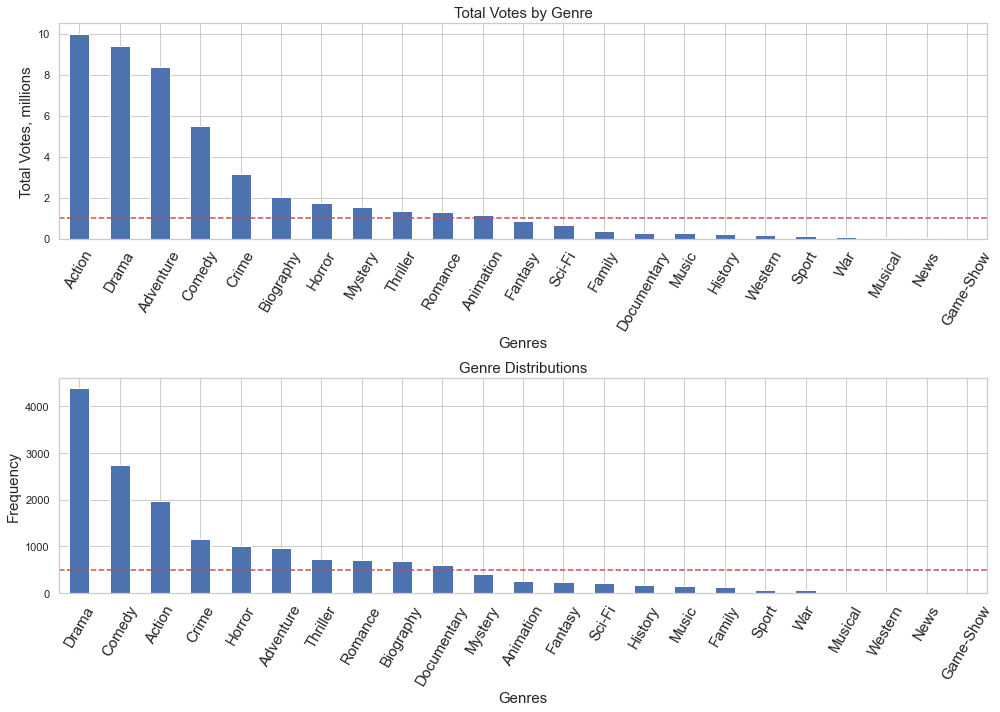

In [393]:
# Next step: combine genre1, genre2 into one column and plot vote distribution.
# This will give us an idea what are the popular genres we should be looking into.

# Extract genre1 and votes from imdb_clean
df1 = imdb_clean[['genre1', 'total_votes']].rename(columns={'genre1': 'genre'})

# Extract genre2 and votes from imdb_clean
df2 = imdb_clean[['genre2', 'total_votes']].rename(columns={'genre2': 'genre'})

# Concatenate horizontally
concatenated_df = pd.concat([df1, df2])
concatenated_df['total_votes'] = concatenated_df['total_votes']/1e+07

# Group by genre and sum up votes
grouped_df = concatenated_df.groupby('genre')['total_votes'].sum()
sorted_df = grouped_df.sort_values(ascending= False)

fig, axes = plt.subplots(2, 1, figsize=(14, 10)) 

sorted_df.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Genres', fontsize=15)
axes[0].set_ylabel('Total Votes, millions', fontsize=15)
axes[0].set_title('Total Votes by Genre', fontsize=15)
axes[0].tick_params(axis='x', rotation=60, labelsize=15) 
axes[0].axhline(y=1, color='r', linestyle='--')
plt.tight_layout()

#genre distribution
genre_counts = concatenated_df['genre'].value_counts()

genre_counts.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Genres', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)
axes[1].set_title('Genre Distributions', fontsize=15)
axes[1].tick_params(axis='x', rotation=60, labelsize=15)
axes[1].axhline(y=500, color='r', linestyle='--')

plt.tight_layout()

In [394]:
# Find the least 10 genres by total_votes
least_10_by_votes = concatenated_df.groupby('genre')['total_votes'].sum().sort_values().head(10)

# Find the 10 least frequent genres
least_10_frequent = concatenated_df['genre'].value_counts().tail(10)

intersection = least_10_by_votes.index.intersection(least_10_frequent.index)

print("Intersection of least 10 genres by total votes and 10 least frequent genres:")
print(intersection)

# entries that have both genres in the 'unpopular'/'unrepresented' list.  
genre_mask = (imdb_clean['genre1'].isin(intersection)) & (imdb_clean['genre2'].isin(intersection))

imdb_filtered_clean = imdb_clean[~genre_mask]
imdb_filtered_clean.head()

Intersection of least 10 genres by total votes and 10 least frequent genres:
Index(['Game-Show', 'News', 'Musical', 'War', 'Sport', 'Western', 'History',
       'Music', 'Family'],
      dtype='object')


,title,year,avg_rating,total_votes,duration_min,genre1,genre2
2387,Inception,2010,8.8,1841066,148.0,Action,Adventure
2241,The Dark Knight Rises,2012,8.4,1387769,164.0,Action,Thriller
280,Interstellar,2014,8.6,1299334,169.0,Adventure,Drama
12072,Django Unchained,2012,8.4,1211405,165.0,Drama,Western
325,The Avengers,2012,8.1,1183655,143.0,Action,Adventure


### 3.3.3. Cleaning Movie Budget Dataframe.
We'll add `year` column to filter out everything before 2000. Then we'll add `net_profit` and `roi` as the raw profit and the return on investment percentage of budget.

In [395]:
# df info
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [396]:
# add year column
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year
movie_budgets_df['month'] = movie_budgets_df['release_date'].dt.month

# function will strip $ and , then convert to numeric
def profits_str2num(profit_col):
    cleaned_str = profit_col.str.replace("$", "").str.replace(",", "")
    cleaned_num = pd.to_numeric(cleaned_str, errors='coerce')
    return cleaned_num
    

# add 'net_profit' and 'roi' columns
gross_numeric = profits_str2num(movie_budgets_df.worldwide_gross)
budget_numeric = profits_str2num(movie_budgets_df.production_budget)

# 
movie_budgets_df['gross_usd_mil'] = gross_numeric/1e+07
movie_budgets_df['budget_usd_mil'] = budget_numeric/1e+07

movie_budgets_df['net_profit_usd_mil'] = (gross_numeric - budget_numeric)/1e+07
movie_budgets_df['roi_pct'] = 100*(gross_numeric - budget_numeric)/budget_numeric

# look at the budget
print(movie_budgets_df['budget_usd_mil'].quantile([0.1, 0.5, 0.75]))

0.10    0.11
0.50    1.70
0.75    4.00
Name: budget_usd_mil, dtype: float64


We'll set the minimum budget to be `$500,000` and the minimum gross at `$0`. 

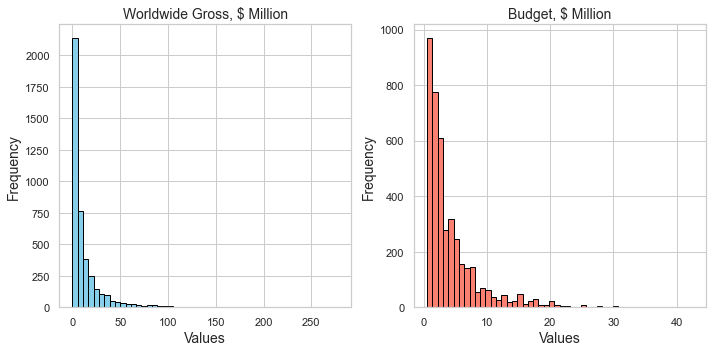

In [397]:
min_budget_mil = 0.5;
min_gross_mil = 0;
movie_budgets_df = movie_budgets_df[(movie_budgets_df['budget_usd_mil'] > min_budget_mil) & \
                          (movie_budgets_df['gross_usd_mil'] > min_gross_mil)].copy()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first histogram
axes[0].hist(movie_budgets_df['gross_usd_mil'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Values', fontsize = 14)
axes[0].set_ylabel('Frequency', fontsize = 14)
axes[0].set_title('Worldwide Gross, $ Million', fontsize = 14)

# Plot the second histogram
axes[1].hist(movie_budgets_df['budget_usd_mil'], bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Values', fontsize = 14)
axes[1].set_ylabel('Frequency', fontsize = 14)
axes[1].set_title('Budget, $ Million', fontsize = 14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [408]:
movie_budgets_df_y2k = movie_budgets_df[movie_budgets_df['year']>=2000]

# select subset of columns then remove nans
cols_of_interest = ['movie', 'year', 'month', 'net_profit_usd_mil', 'budget_usd_mil', 'gross_usd_mil', 'roi_pct']
movie_budgets_df_clean = movie_budgets_df_y2k[cols_of_interest].dropna()

# Rename the 'movie' column to 'title'
movie_budgets_df_clean.rename(columns={'movie':'title'}, inplace=True)
movie_budgets_df_clean.head()

,title,year,month,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct
0,Avatar,2009,12,235.134528,42.50,277.634528,553.257713
1,Pirates of the Caribbean: On Stranger Tides,2011,5,63.506388,41.06,104.566388,154.667286
2,Dark Phoenix,2019,6,-20.023765,35.00,14.976235,-57.210757
3,Avengers: Age of Ultron,2015,5,107.241396,33.06,140.301396,324.384139
4,Star Wars Ep. VIII: The Last Jedi,2017,12,99.972175,31.70,131.672175,315.369636


## 3.4. Combining IMDB and Budget Dataframes.

Let's see how much movie title cleaning we might need to do before merging.

In [407]:
# how many movie titles from budget df are NOT present in IMDB df
movie_budgets_df_clean[~movie_budgets_df_clean['title'].isin(imdb_filtered_clean.title)]

,title,year,month,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct,title_preprocessed,closest_match
0,Avatar,2009,12,235.134528,42.500,277.634528,553.257713,avatar,None
4,Star Wars Ep. VIII: The Last Jedi,2017,12,99.972175,31.700,131.672175,315.369636,star wars ep viii the last jedi,star wars the last jedi
5,Star Wars Ep. VII: The Force Awakens,2015,12,174.731122,30.600,205.331122,571.016739,star wars ep vii the force awakens,star wars episode vii the force awakens
7,Pirates of the Caribbean: At Worldâs End,2007,5,66.342043,30.000,96.342043,221.140142,pirates of the caribbean at worldâs end,None
15,Spider-Man 3,2007,5,63.686023,25.800,89.486023,246.845050,spiderman 3,None
...,...,...,...,...,...,...,...,...,...
4239,Hodejegerne,2012,4,1.493874,0.525,2.018874,284.547429,hodejegerne,imogene
4240,The Ten,2007,8,-0.446332,0.525,0.078668,-85.015676,the ten,None
4241,A Room for Romeo Brass,2000,10,-0.522990,0.525,0.002010,-99.617200,a room for romeo brass,None
4242,The Girl with all the Gifts,2017,2,-0.044816,0.525,0.480184,-8.536438,the girl with all the gifts,the girl in the fog


In [406]:
# Uh-oh, some heavy-hitters didn't make it. Can't believe Avatar didn't make it!
movie_basics[movie_basics.primary_title.str.contains('Avatar')]
# confirming we widn't yank out the most expesive movie accidentally

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
1795,tt10168040,My Avatar Horse,My Avatar Horse,2012,NaN,Drama
4315,tt10403262,Xbox Avatar Fun,Xbox Avatar Fun,2019,NaN,Action
11392,tt1630029,Avatar 2,Avatar 2,2021,NaN,"Action,Adventure,Fantasy"
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama"
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror
20368,tt1854506,Aliens vs. Avatars,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi"
34245,tt2271191,Avatars as Prostitutes,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama"
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
68178,tt3879186,Avatarii: Birth of a Fandom,Avatarii: Birth of a Fandom,2014,NaN,Documentary
77990,tt4472992,Avatarachi Goshta,Avatarachi Goshta,2014,118.0,Drama


Supplimentary functions to clean movie titles in both tables and find closest match within movie release year.

In [404]:
# stripping titles and finding closest match
import string
from difflib import SequenceMatcher

# Function to preprocess title
def preprocess_title(title):
    # Remove punctuation and convert to lowercase
    title = title.translate(str.maketrans('', '', string.punctuation)).lower()
    return title

# Define the function to find the closest match
def find_closest_match(row, df2):
    #select subset of a year 
    df2_subset = df2[df2['year'] == row['year']]
    string1 = row['title_preprocessed']
    # List to store similarity ratios
    ratios = []
    
    # Iterate over each title in df2_subset
    for title in df2_subset['title_preprocessed']:
        # Create a SequenceMatcher object
        matcher = SequenceMatcher(None, string1, title)
        # Calculate similarity ratio and append to ratios list
        ratios.append(matcher.ratio())
    # if not empty 
    if ratios:
        # Find index of highest similarity ratio
        max_index = ratios.index(max(ratios))
        # Return the title corresponding to the highest similarity ratio
        closest_title = df2_subset.iloc[max_index]['title_preprocessed']
        return closest_title
    else:
        return None

# Add preprocessed title for both dataframes
movie_budgets_df_clean.loc[:, 'title_preprocessed'] = movie_budgets_df_clean['title'].apply(preprocess_title).copy()
imdb_filtered_clean.loc[:, 'title_preprocessed'] = imdb_filtered_clean['title'].apply(preprocess_title).copy()

# Find titles not found in IMDb
found_in_imdb_df = movie_budgets_df_clean

/Users/alexandrayakovleva/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [402]:
# find closest match
found_in_imdb_df.loc[:, 'closest_match'] = \
    movie_budgets_df_clean.apply(find_closest_match, args=(imdb_filtered_clean,), axis=1)

In [409]:
found_in_imdb_df.dropna()
budget_cols = ['month','closest_match', 'net_profit_usd_mil', 'budget_usd_mil', 'gross_usd_mil', 'roi_pct']
ratings_cols = ['title', 'title_preprocessed', 'year', \
                'avg_rating', 'total_votes', 'duration_min', 'genre1', 'genre2']
rated_movies_with_budgets_df = pd.merge(found_in_imdb_df[budget_cols], imdb_filtered_clean[ratings_cols], \
                     left_on='closest_match', right_on='title_preprocessed', how='inner')
# Display the merged dataframe
rated_movies_with_budgets_df.head()

,month,closest_match,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct,title,title_preprocessed,year,avg_rating,total_votes,duration_min,genre1,genre2
0,5,pirates of the caribbean on stranger tides,63.506388,41.06,104.566388,154.667286,Pirates of the Caribbean: On Stranger Tides,pirates of the caribbean on stranger tides,2011,6.6,447624,136.0,Action,Adventure
1,6,dark phoenix,-20.023765,35.00,14.976235,-57.210757,Dark Phoenix,dark phoenix,2019,6.0,24451,113.0,Action,Adventure
2,5,avengers age of ultron,107.241396,33.06,140.301396,324.384139,Avengers: Age of Ultron,avengers age of ultron,2015,7.3,665594,141.0,Action,Adventure
3,12,star wars the last jedi,99.972175,31.70,131.672175,315.369636,Star Wars: The Last Jedi,star wars the last jedi,2017,7.1,462903,152.0,Action,Adventure
4,12,star wars episode vii the force awakens,174.731122,30.60,205.331122,571.016739,Star Wars: Episode VII - The Force Awakens,star wars episode vii the force awakens,2015,8.0,784780,136.0,Action,Adventure


# 4. Exploratory Analysis.

Here we'll explore the relationship between movie's ratings, budget, gross, profit and genres.
Historic trends:
* Movie budgets and profits, what are the historic trends?
* What are the most expensive and profitable genres?
* What are the most popular (reviewed) genres by year?
* What are the highest-rated genres?


Then we'll do more specific analysis, focusing on what kind of movies generated a net profit and had good revires or were viewed the most.

### 4.1. Historic trends.
The data we assembled covers only a decade and we cannot draw many conclusions except. What we can interpret from the trend is the following:
   * Average movie budget per year is steadily increasing.
   * Average movie gross per year is increasing at faster rate.

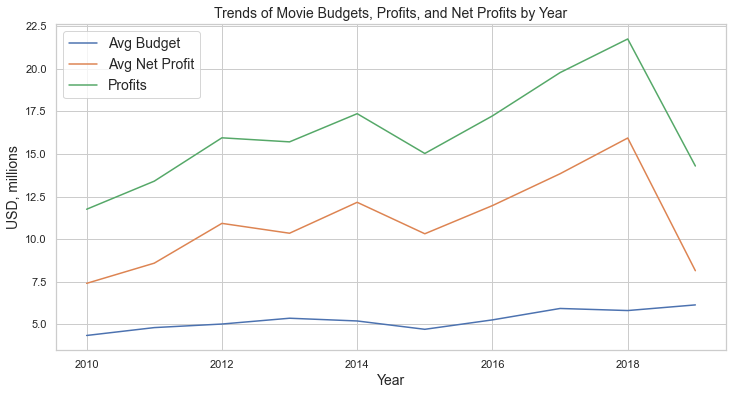

In [410]:
# Historic trends: movie budgets and profits
grouped_by_year = rated_movies_with_budgets_df.groupby('year').agg({
    'budget_usd_mil': 'mean',
    'net_profit_usd_mil': 'mean',
    'gross_usd_mil': 'mean'
}).reset_index()

# Melt the DataFrame to plot multiple variables
melted_df = pd.melt(grouped_by_year, id_vars='year', value_vars=['budget_usd_mil', 'net_profit_usd_mil', 'gross_usd_mil'],
                    var_name='Metric', value_name='Amount')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='year', y='Amount', hue='Metric')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('USD, millions', fontsize = 14)
plt.title('Trends of Movie Budgets, Profits, and Net Profits by Year', fontsize = 14)
plt.legend(['Avg Budget', 'Avg Net Profit', 'Profits'], fontsize = 14)
plt.grid(True)
plt.show()

## 4.2. Budgets and Profits.
From the distribution of average budgets and profits, we can 
* Action, Adventure, Fantasy, History all have fantastic budget:profit ratio.
* Adventure movies are the most expensive to make but they bring in the most profit.

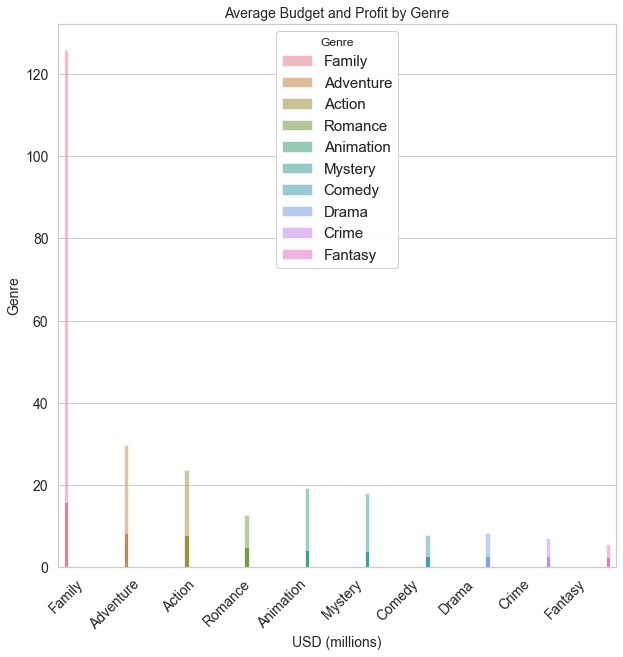

In [411]:
# Budgets and gross profits by genres
grouped_by_genre = rated_movies_with_budgets_df.groupby('genre1').agg({'budget_usd_mil': 'mean', 'gross_usd_mil': 'mean'}).reset_index()

# Sort the DataFrame by total budget and total profit in ascending order
grouped_by_genre_sorted = grouped_by_genre.sort_values(by=['budget_usd_mil', 'gross_usd_mil'], ascending=[False, False])
# Calculate average rating for each genre

# Select top 10 genres with highest ratings
top_10_genres = grouped_by_genre_sorted.head(10)
palette = sns.color_palette("husl", n_colors=len(top_10_genres))

# Plot the genres with the lowest budgets and highest profits
plt.figure(figsize=(10, 10))
sns.barplot(x='genre1', y='budget_usd_mil', data=top_10_genres, hue='genre1', \
            palette=palette)
sns.barplot(x='genre1', y='gross_usd_mil', data=top_10_genres, hue='genre1', \
            palette=palette, alpha=0.5)
plt.xlabel('USD (millions)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Average Budget and Profit by Genre', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add legend only for 'gross_usd_mil' data
handles, labels = plt.gca().get_legend_handles_labels()
gross_legend = plt.legend(handles[len(top_10_genres):], labels[len(top_10_genres):], title='Genre', fontsize=15)
plt.gca().add_artist(gross_legend);

#plt.legend(fontsize=14)
plt.show()

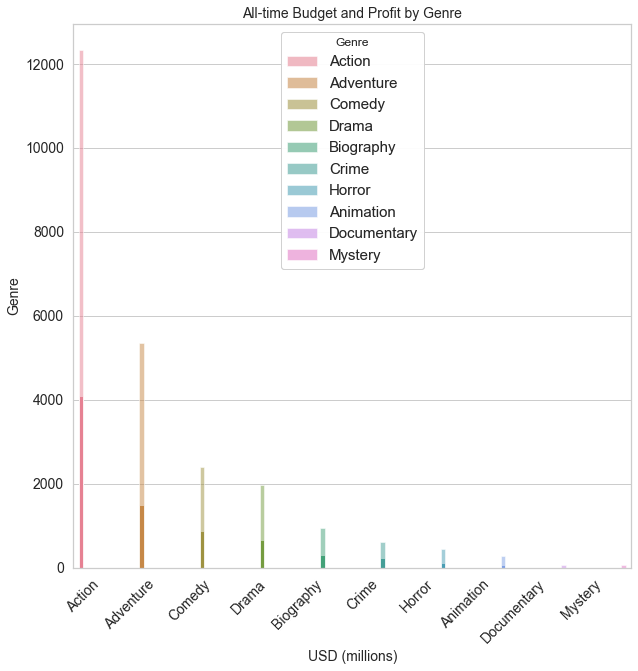

In [412]:
# Budgets and gross profits by genres
grouped_by_genre = rated_movies_with_budgets_df.groupby('genre1').agg({'budget_usd_mil': 'sum', 'gross_usd_mil': 'sum'}).reset_index()

# Sort the DataFrame by total budget and total profit in ascending order
grouped_by_genre_sorted = grouped_by_genre.sort_values(by=['budget_usd_mil', 'gross_usd_mil'], ascending=[False, False])
# Calculate average rating for each genre

# Select top 10 genres 
top_10_genres = grouped_by_genre_sorted.head(10)
palette = sns.color_palette("husl", n_colors=len(top_10_genres))

# Plot the genres with the lowest budgets and highest profits
plt.figure(figsize=(10, 10))
sns.barplot(x='genre1', y='budget_usd_mil', data=top_10_genres, hue='genre1', \
            palette=palette)
sns.barplot(x='genre1', y='gross_usd_mil', data=top_10_genres, hue='genre1', \
            palette=palette, alpha=0.5)
plt.xlabel('USD (millions)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('All-time Budget and Profit by Genre', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add legend only for 'gross_usd_mil' data
handles, labels = plt.gca().get_legend_handles_labels()
gross_legend = plt.legend(handles[len(top_10_genres):], labels[len(top_10_genres):], title='Genre', fontsize=15)
plt.gca().add_artist(gross_legend);

#plt.legend(fontsize=14)
plt.show()


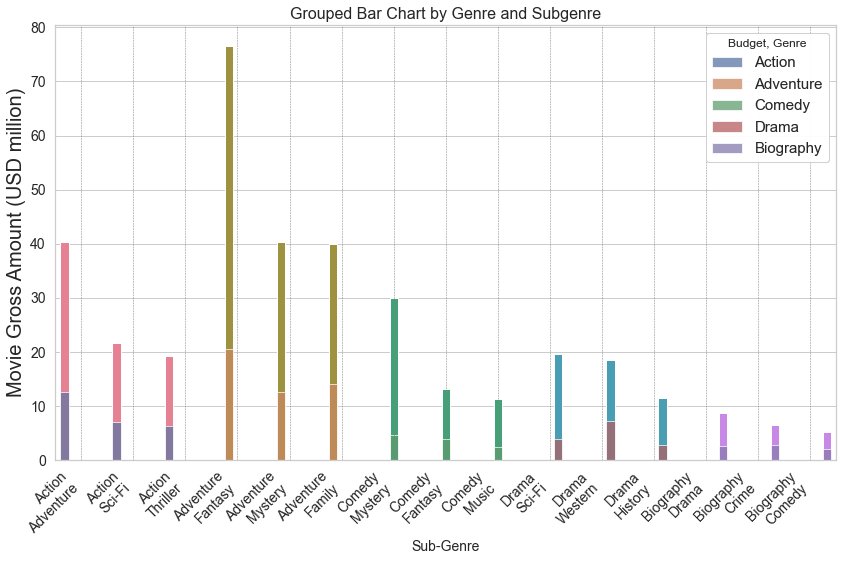

In [492]:
# Group by 'genre1' and 'genre2', then calculate the mean of 'gross_usd_mil' and 'budget_usd_mil' for each group
grouped_df = rated_movies_with_budgets_df.groupby(['genre1', 'genre2']).agg({'gross_usd_mil': 'mean', 'budget_usd_mil': 'mean'}).reset_index()

# Get the top five most profitable 'genre1' by 'gross_usd_mil'
top_genre1 = rated_movies_with_budgets_df.groupby('genre1')['gross_usd_mil'].sum().nlargest(5).index

grouped_df = grouped_df[grouped_df['genre1'].isin(top_genre1)]

# For each top 'genre1', get the top three most profitable 'genre2'
genre_data = {}
for genre1 in top_genre1:
    genre_data[genre1] = grouped_df[grouped_df['genre1'] == genre1].nlargest(3, 'gross_usd_mil')

# Create DataFrame for plotting
plot_data = pd.concat(genre_data.values())

# Plotting
plt.figure(figsize=(14, 8))

# Set color palette for each genre1
palette = sns.color_palette("husl", n_colors=len(top_genre1))

# Initialize positions for x-axis ticks
positions = np.arange(len(plot_data))

# Plot bars for 'budget_usd_mil' as stacked bars
sns.barplot(data=plot_data, x=positions, y='gross_usd_mil', hue='genre1', \
            palette=palette)

# Plot bars for 'gross_usd_mil' on top of 'budget_usd_mil' as stacked bars
bottom = plot_data.groupby('genre1')['budget_usd_mil'].transform('mean')

# Plot bars for 'gross_usd_mil' on top of 'budget_usd_mil' as stacked bars
sns.barplot(data=plot_data, x=positions, y='budget_usd_mil', hue='genre1', alpha=0.7)

# Set x-axis tick labels
plt.xticks(positions, [f'{genre1}\n{genre2}' for genre1, data in genre_data.items() for genre2 in data['genre2']], rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Set x-axis label
plt.xlabel('Sub-Genre', fontsize=14)

# Set y-axis label
plt.ylabel('Movie Gross Amount (USD million)', fontsize=20)

# Set title
plt.title('Grouped Bar Chart by Genre and Subgenre', fontsize=16)

# Set legend
# Add legend only for 'gross_usd_mil' data
handles, labels = plt.gca().get_legend_handles_labels()
gross_legend = plt.legend(handles[len(top_genre1):], labels[len(top_genre1):], title='Budget, Genre', fontsize=15)
plt.gca().add_artist(gross_legend)

# Add vertical segments to the entire figure
for pos in positions:
    plt.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)


## 4.3 Top 10 Ratings and Reviews

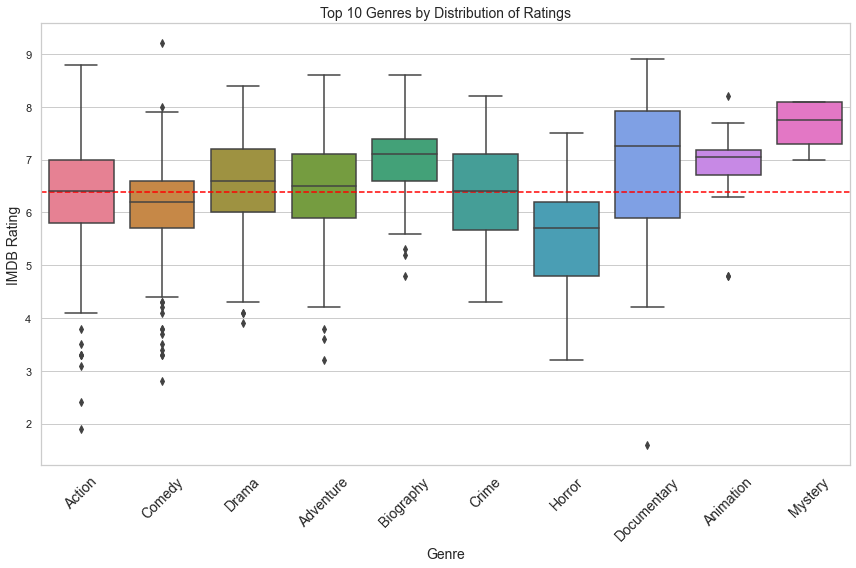

In [523]:
# Calculate average rating for each genre
# Select top 10 genres with highest ratings
top_genres = rated_movies_with_budgets_df['genre1'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 genres
top_10_df = rated_movies_with_budgets_df[rated_movies_with_budgets_df['genre1'].isin(top_genres)]

genre_avg_rating = top_10_df.groupby('genre1')['avg_rating'].mean()
avg_rating = top_10_df['avg_rating'].mean()
# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='avg_rating', data=top_10_df, palette='husl', order=top_genres)
plt.ylabel('IMDB Rating', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.title('Top 10 Genres by Distribution of Ratings', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability
plt.axhline(y=avg_rating, color='red', linestyle='--')

plt.tight_layout()

# production plot
plt.savefig(f"{genre}_plot.png")

plt.show()

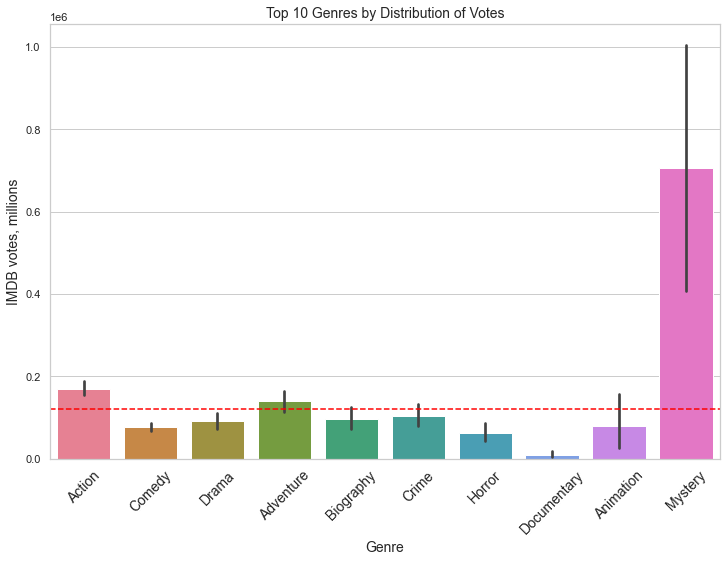

<Figure size 432x288 with 0 Axes>

In [526]:
# Calculate avg votes for each genre

# avg vote
avg_vote = top_10_df['total_votes'].mean()

# plot
plt.figure(figsize=(12, 8))
sns.barplot(x='genre1', y='total_votes', data=top_10_df, palette='husl', order=top_genres)
plt.ylabel('IMDB votes, millions', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.title('Top 10 Genres by Distribution of Votes', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability
plt.axhline(y=avg_vote, color='red', linestyle='--')

plt.show()

plt.savefig(f"{genre}_plot.png")


In [758]:
# save 
genre_table = top_10_df.groupby('genre1').agg({'total_votes': 'mean', 'avg_rating': 'mean', \
                                 'net_profit_usd_mil': 'mean', 'budget_usd_mil': 'mean',
                                'duration_min':'mean'})

## 4.4 Top 10 Genres: Historic and Seasonal Trends.

2.48892642947741
1.2762964675164319
2.3062666051964364
2.4921878572365412
2.230163115785034
3.564453802654116
1.160733685522168
1.550689282598753
2.657067824500844
1.027627008792019


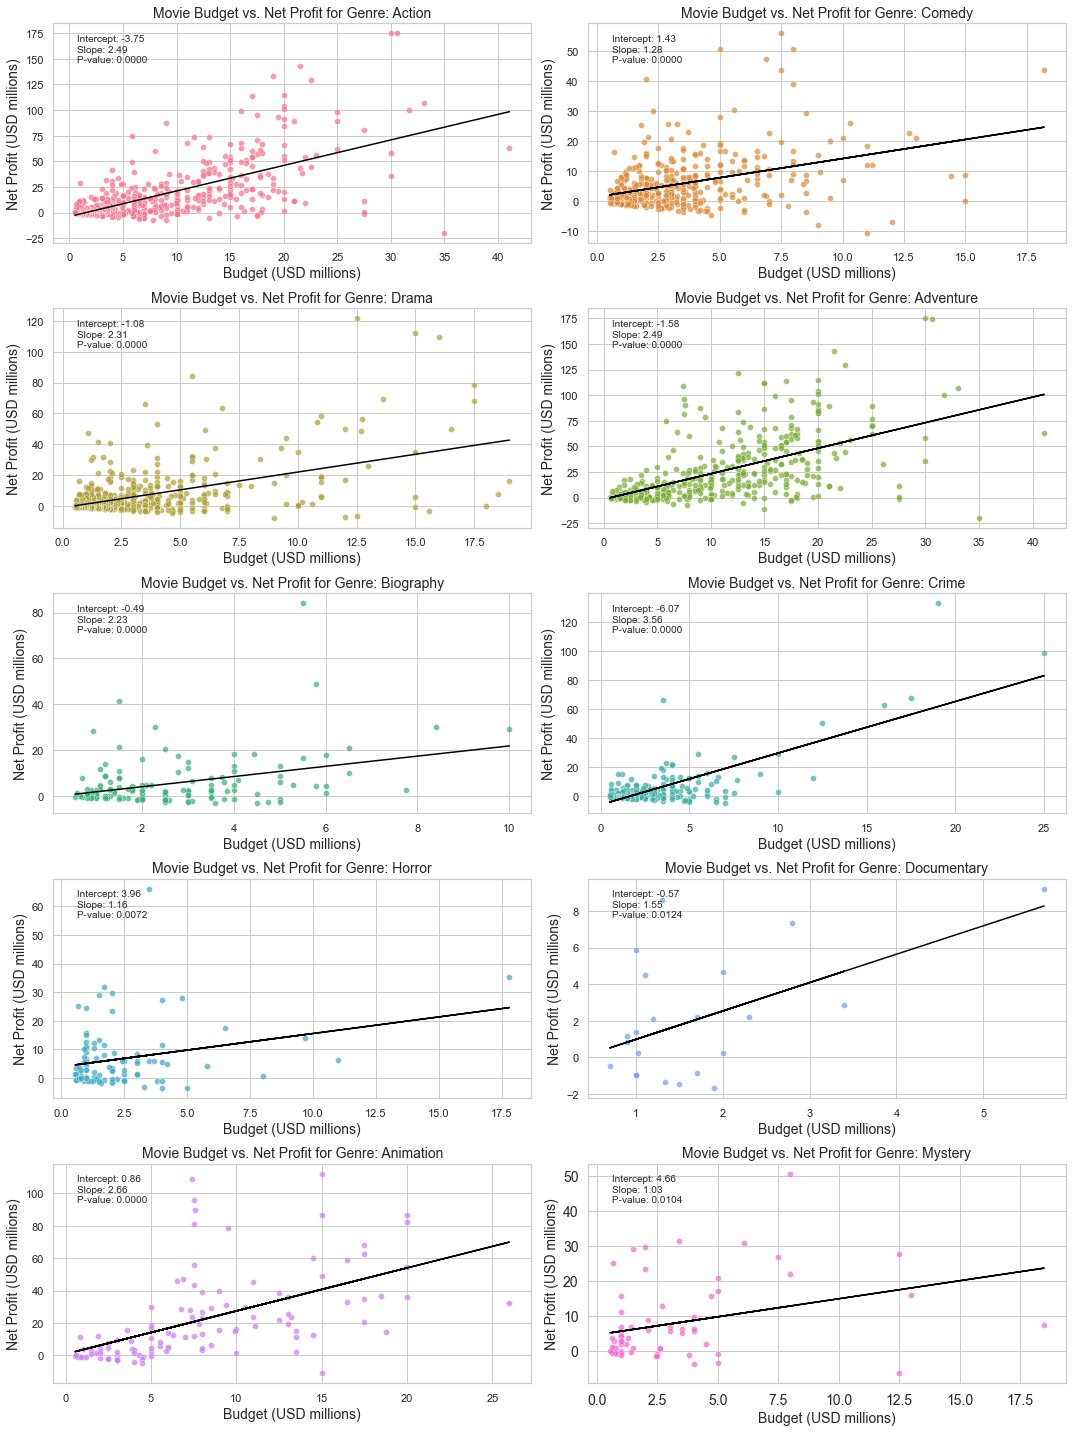

In [836]:
import statsmodels.api as sm
# Get the 10 most represented genres
top_genres = rated_movies_with_budgets_df['genre1'].value_counts().nlargest(10).index

# Generate a color palette with as many colors as there are unique genres
palette = sns.color_palette("husl", n_colors=len(top_genres))

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Iterate over the top genres and create subplots
for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = genres_combined_df[genres_combined_df['genre'] == genre]
    
    X = sm.add_constant(genre_data["budget_usd_mil"])  # Add constant term for the intercept
    y = genre_data["net_profit_usd_mil"]
    
    # Fit a linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
    #add expected slope to genre table
    genre_table.at[genre, 'expected_ret'] = results.params.budget_usd_mil
    # Create the scatter plot for the current genre with the assigned color
    sns.scatterplot(data=genre_data, x="budget_usd_mil", y="net_profit_usd_mil", alpha=0.7, color=color, ax=ax)

    # Add the regression line for the current genre
    ax.plot(genre_data["budget_usd_mil"], results.predict(X), color="black")

    # Add model parameters and p-values as text
    ax.text(0.05, 0.95, f"Intercept: {results.params['const']:.2f}\nSlope: {results.params['budget_usd_mil']:.2f}\nP-value: {results.pvalues['budget_usd_mil']:.4f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top')

    ax.set_title(f"Movie Budget vs. Net Profit for Genre: {genre}", fontsize=14)
    ax.set_xlabel("Budget (USD millions)", fontsize=14)
    ax.set_ylabel("Net Profit (USD millions)", fontsize=14)
    ax.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()

In [837]:
#add expected slope to genre table
genre_table

,total_votes,avg_rating,net_profit_usd_mil,budget_usd_mil,duration_min,top3_months,top3_content_rating,expected_ret
genre1,,,,,,,,
Action,170645.174664,6.375048,15.811429,7.857618,114.489443,"May, June, July","PG-13, PG",2.488926
Adventure,139611.044444,6.474444,21.393020,8.302250,103.111111,"November, July, June","PG-13, PG, G",2.492188
Animation,78878.428571,6.778571,15.138623,4.246429,94.214286,"September, December, July",PG,2.657068
Biography,97395.624000,7.015200,5.140996,2.519440,119.856000,"November, December, October","PG-13, R, PG",2.230163
Comedy,76328.544554,6.112871,5.074057,2.888891,105.953795,"May, December, June","PG-13, PG, G",1.276296
Crime,104668.272727,6.347727,4.417093,2.695625,110.852273,"September, June, November","PG-13, NC-17",3.564454
Documentary,9996.750000,6.743750,2.591127,1.735625,98.312500,"February, October, August","R, PG",1.550689
Drama,91029.440678,6.549576,5.565997,2.826691,114.444915,"February, March, December","PG-13, PG, G",2.306267
Horror,63535.333333,5.513725,6.578637,2.060392,98.666667,"September, August, October","R, PG-13",1.160734


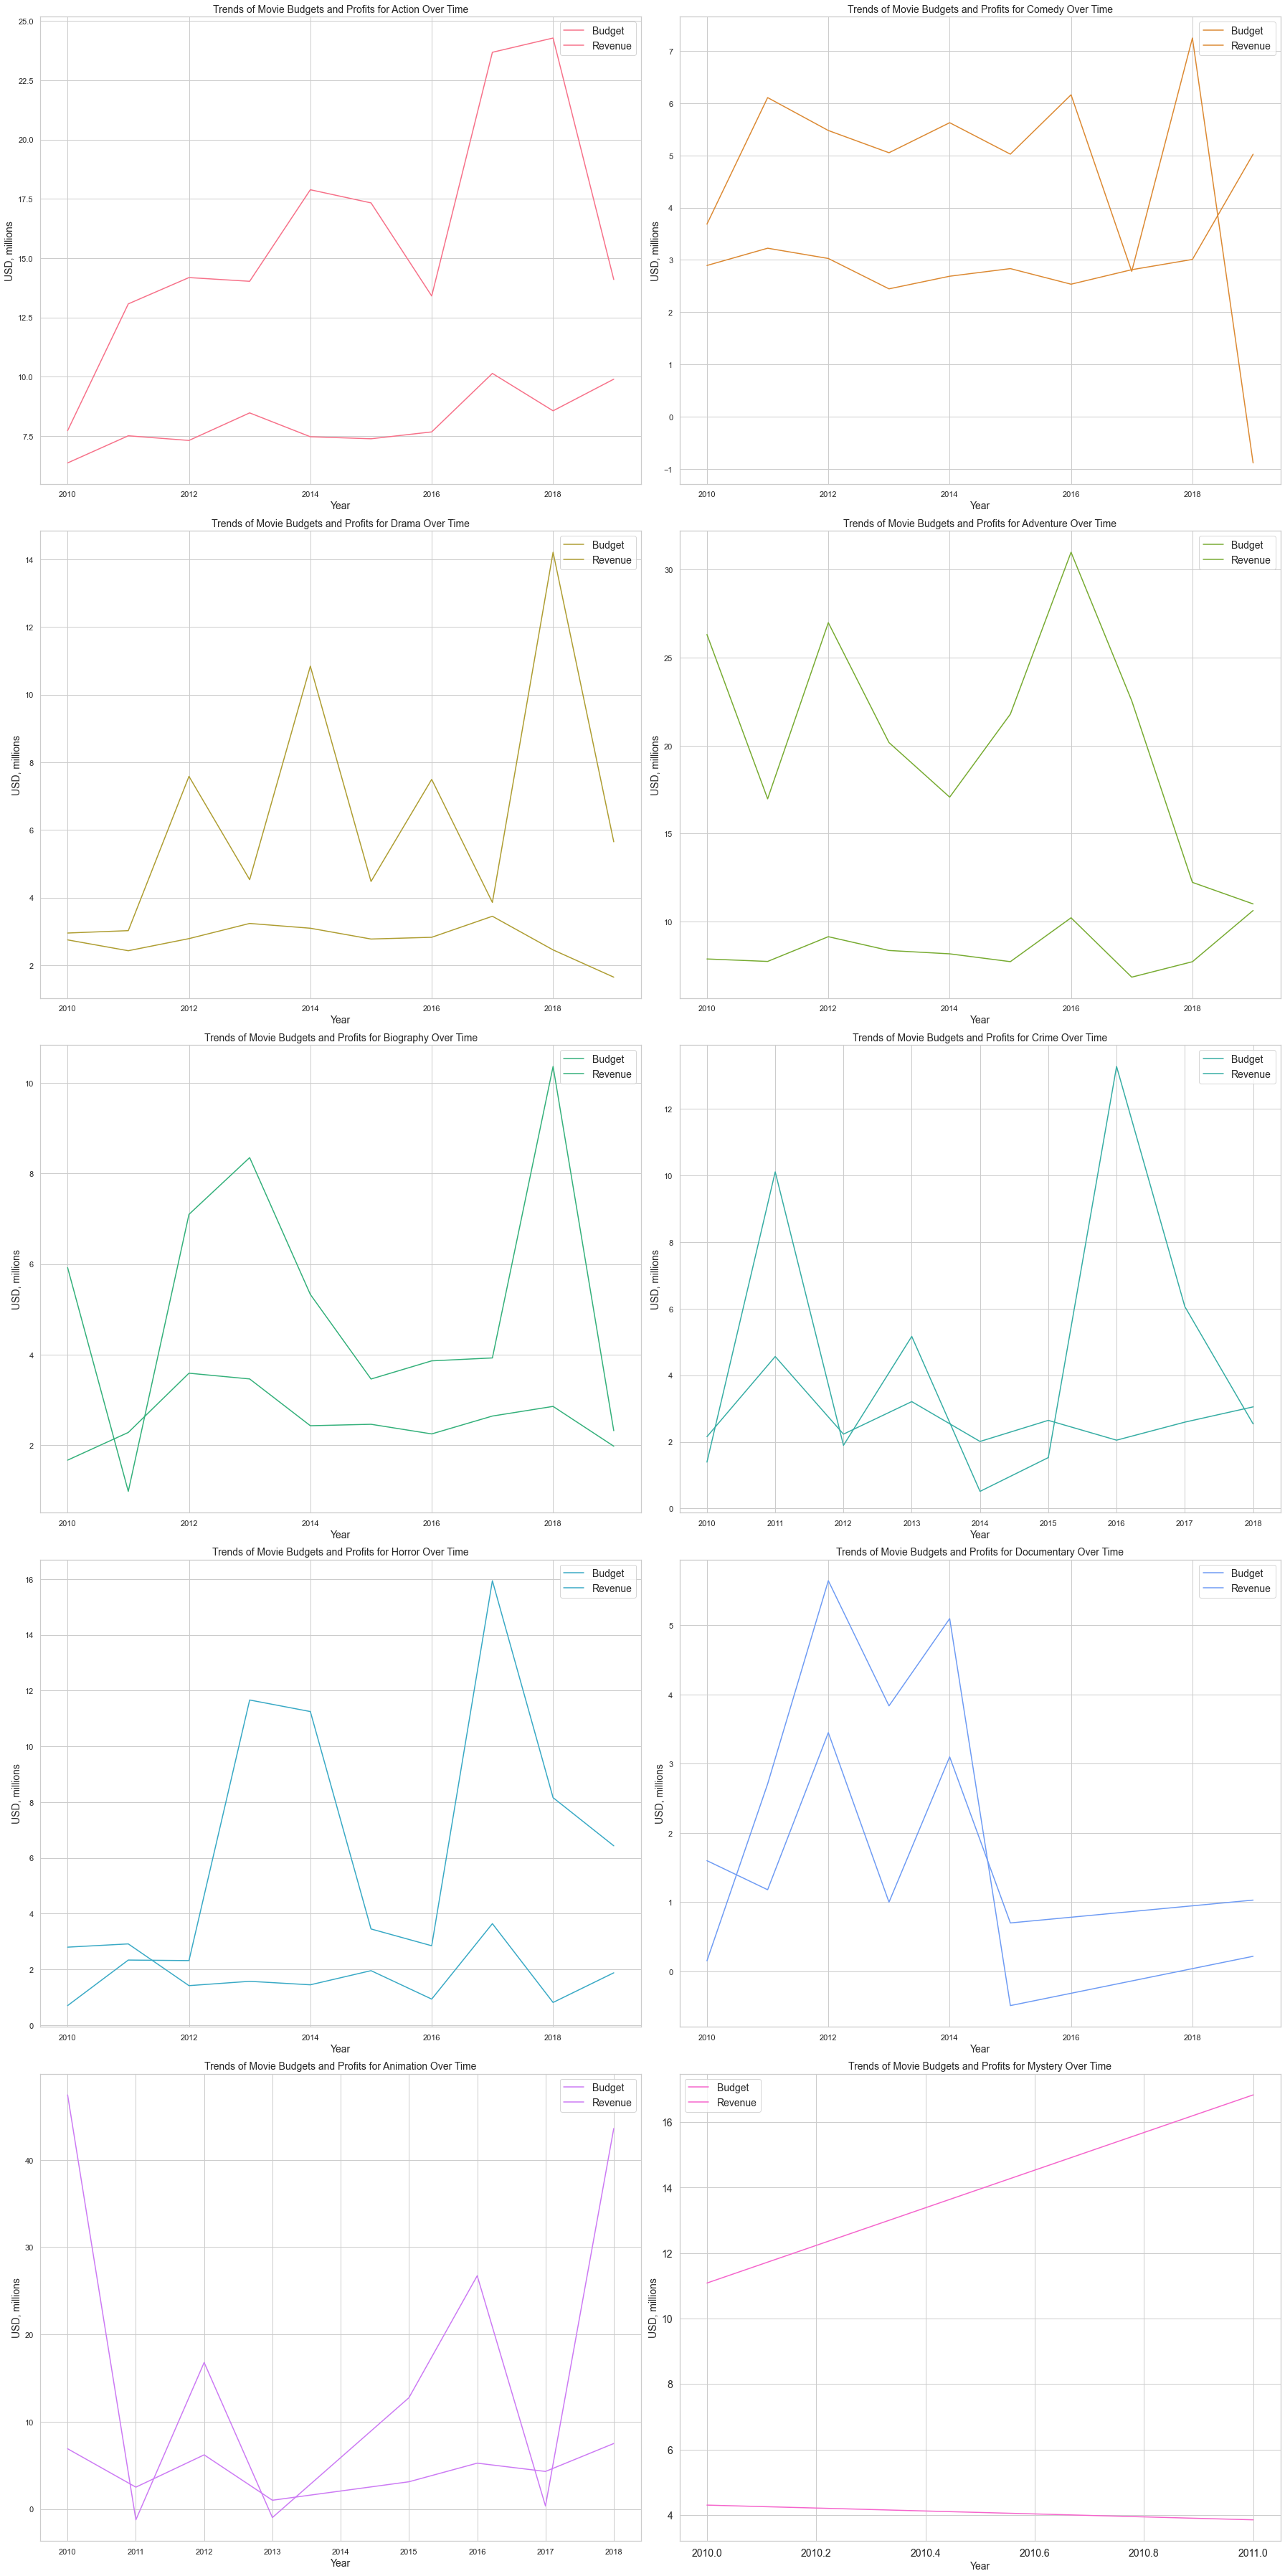

In [477]:
# Historic trends: movie budgets and profits
# Group by year and genre, then aggregate mean values of budget and revenue

grouped_by_year_genre = rated_movies_with_budgets_df.groupby(['year', 'genre1']).agg({
    'budget_usd_mil': 'mean',
    'net_profit_usd_mil': 'mean'
}).reset_index()

# Get unique genres
# Set up subplots
num_rows = 5
fig, axes = plt.subplots(num_rows, 2, figsize=(25, 10 * num_rows))
palette = sns.color_palette("husl", n_colors=10)

# Plot each genre

for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = grouped_by_year_genre[grouped_by_year_genre['genre1'] == genre]
    
    # Plot data
    sns.lineplot(data=genre_data, x='year', y='budget_usd_mil', ax=ax, label='Budget', color=color)
    sns.lineplot(data=genre_data, x='year', y='net_profit_usd_mil', ax=ax,label='Revenue', color=color)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # Set title and labels
    ax.set_title(f'Trends of Movie Budgets and Profits for {genre} Over Time', fontsize=14)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('USD, millions', fontsize=14)
    ax.legend(fontsize=14, )


# Adjust layout
plt.tight_layout()
plt.show()

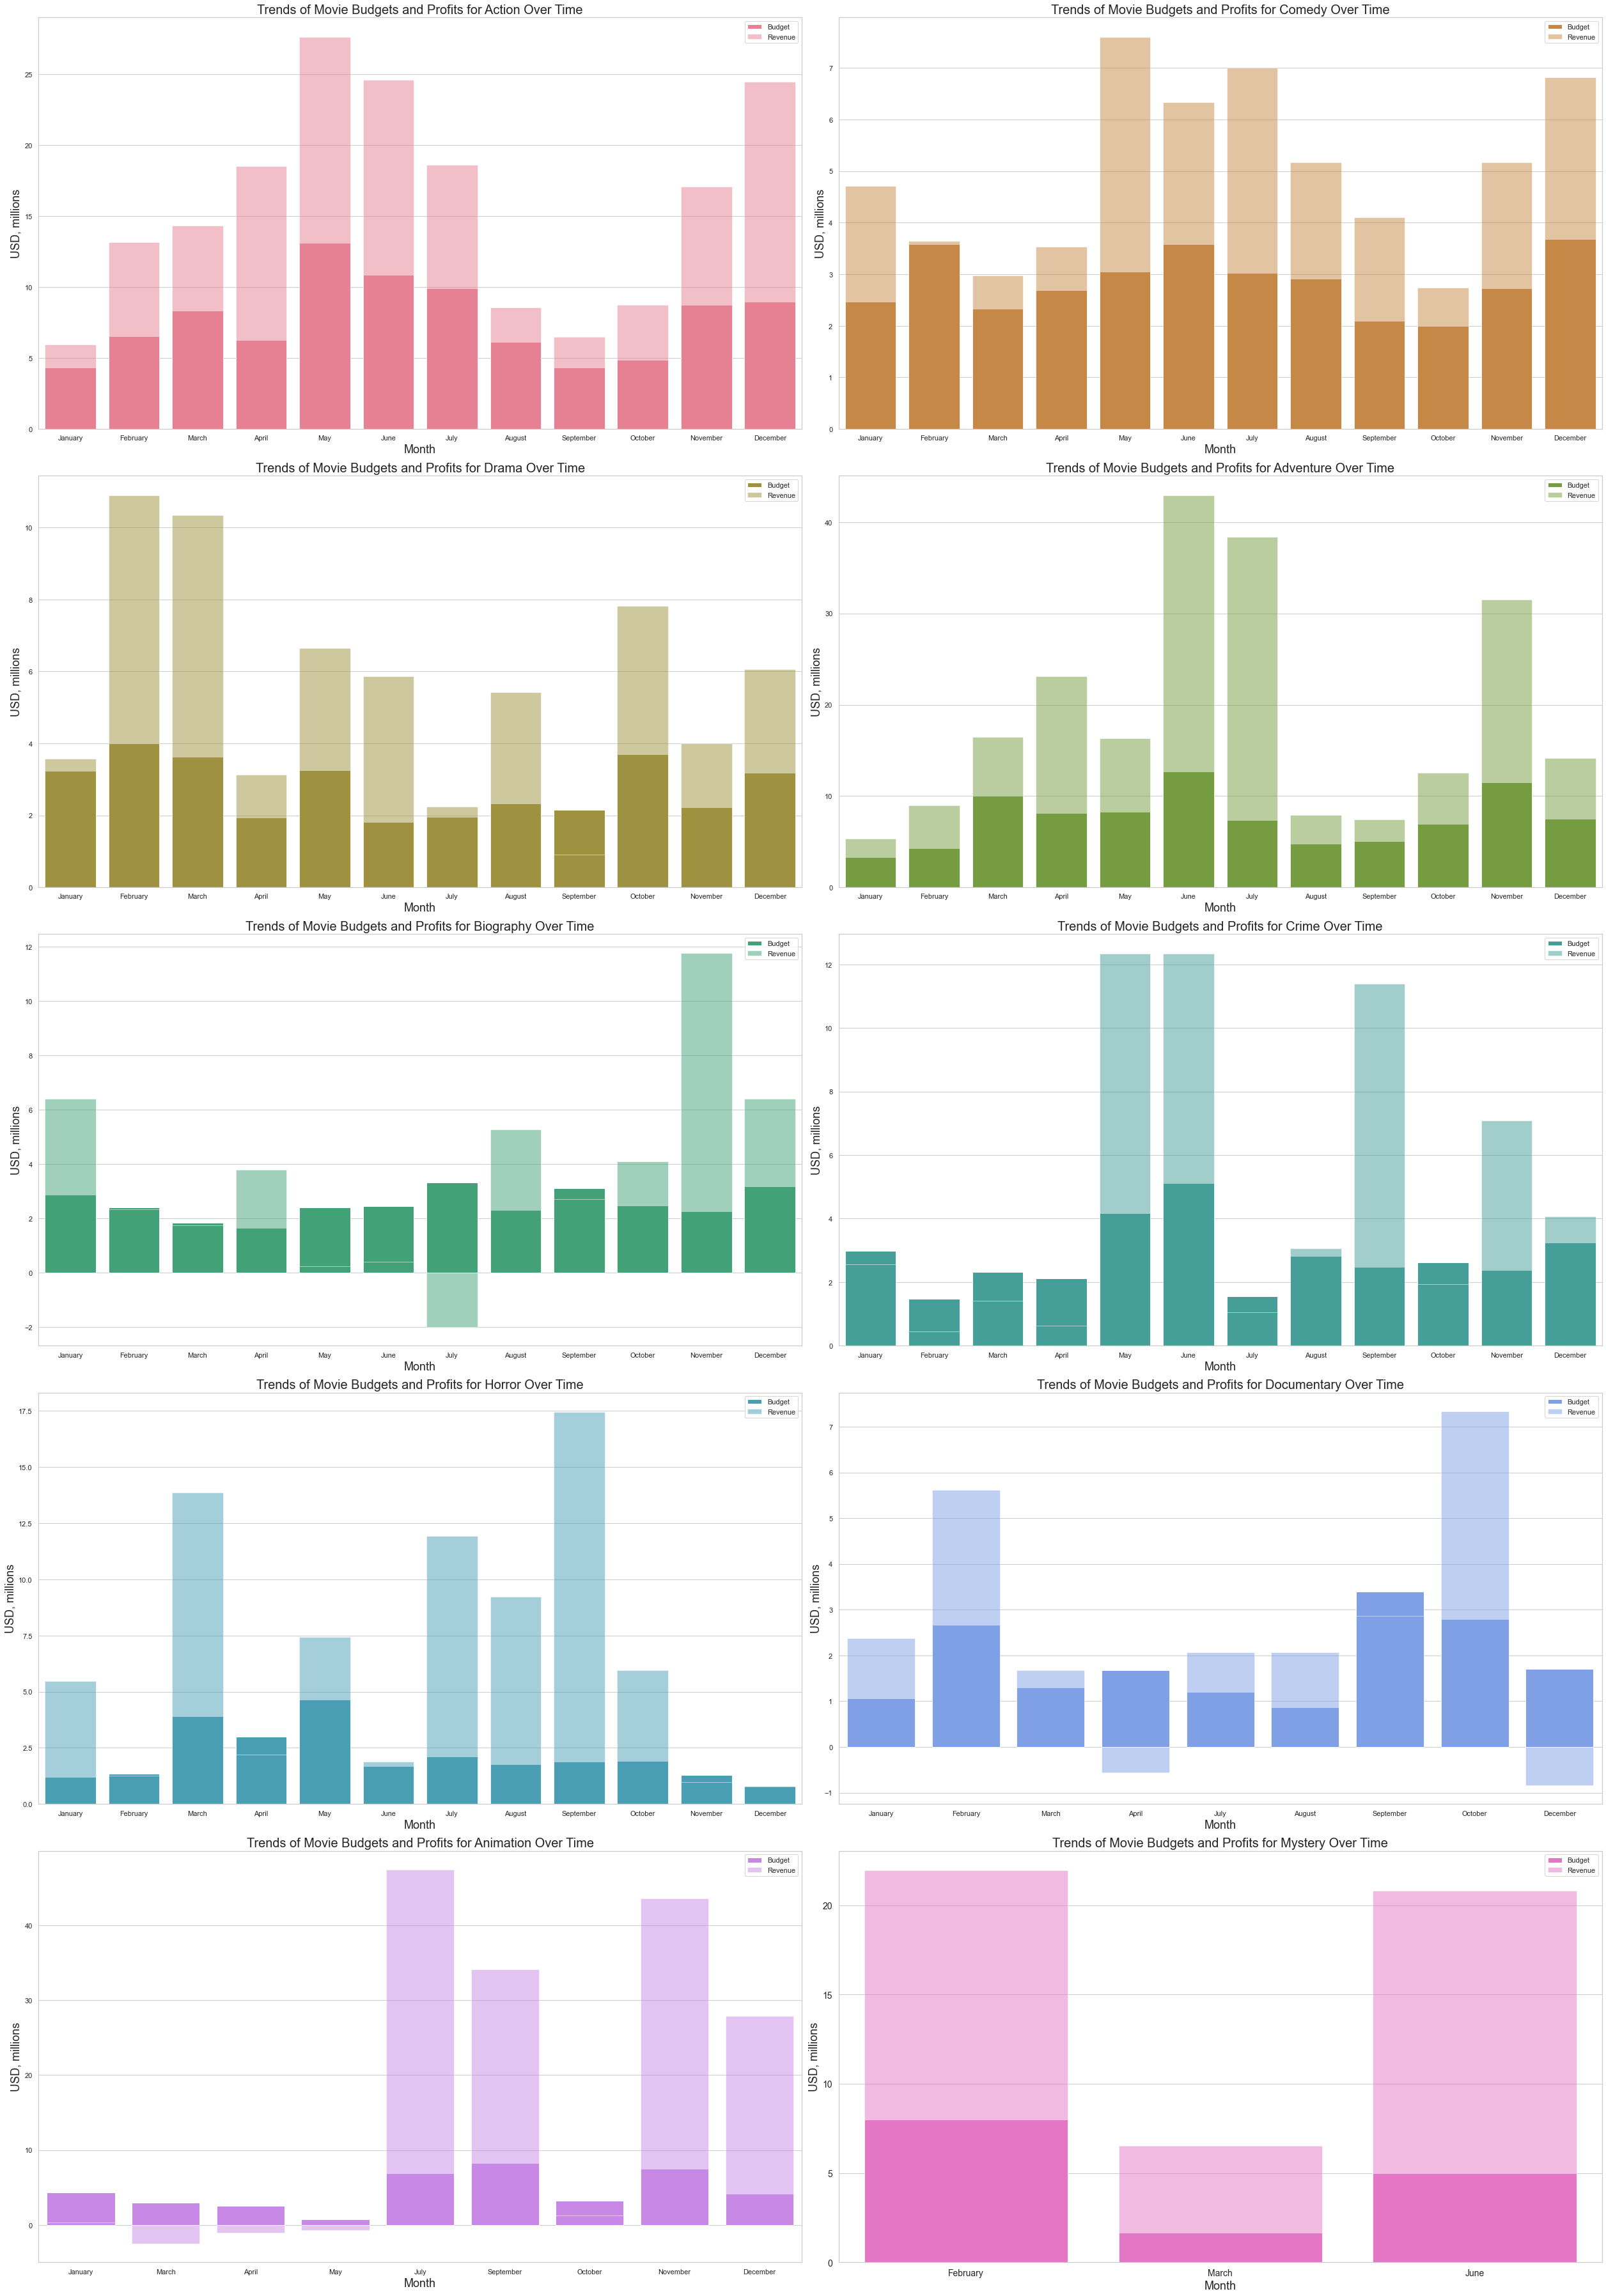

In [652]:
import calendar

# Historic trends: movie budgets and profits
# Group by year and genre, then aggregate mean values of budget and revenue

grouped_by_month_genre = rated_movies_with_budgets_df.groupby(['month', 'genre1']).agg({
    'budget_usd_mil': 'mean',
    'net_profit_usd_mil': 'mean'
}).reset_index()

grouped_by_month_genre['month_str'] = grouped_by_month_genre['month'].apply(lambda x: calendar.month_name[x])

# Set up subplots
num_rows = 5
fig, axes = plt.subplots(num_rows, 2, figsize=(35, 10 * num_rows))
palette = sns.color_palette("husl", n_colors=10)


# Plot each genre
grouped_by_month_genre
for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = grouped_by_month_genre[grouped_by_month_genre['genre1'] == genre]
    # Print the content ratings and their corresponding mean net profits

    # Plot data
    sns.barplot(data=genre_data, x='month_str', y='budget_usd_mil', ax=ax, label='Budget', color=color)
    sns.barplot(data=genre_data, x='month_str', y='net_profit_usd_mil', ax=ax,label='Revenue', color=color, alpha=0.5)
    
    # Set title and labels
    ax.set_title(f'Trends of Movie Budgets and Profits for {genre} Over Time', fontsize = 20)
    ax.set_xlabel('Month', fontsize = 18)
    ax.set_ylabel('USD, millions', fontsize = 18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax.legend()
    
# Adjust layout
plt.tight_layout()
plt.show()

In [824]:
# Group by both 'genre1' and 'month' and calculate the sum of 'net_profit_usd_mil' for each group
profitable_months = top_10_df.groupby(['genre1', 'month'])['net_profit_usd_mil'].sum().reset_index()

# Sort the DataFrame by 'genre1' and 'net_profit_usd_mil' in descending order
sorted_profitable_months = profitable_months.sort_values(by=['genre1', 'net_profit_usd_mil'], ascending=[True, False])

# Select the top three profitable release months for each genre
top_three_months_per_genre = sorted_profitable_months.groupby('genre1').head(3)

# Convert the 'month' column to month names
top_three_months_per_genre.loc[:, 'month'] = top_three_months_per_genre['month'].apply(lambda x: calendar.month_name[x])

# Aggregate the top three months into a single string for each genre
top_three_months_agg = top_three_months_per_genre.groupby('genre1')['month'].apply(lambda x: ', '.join(x)).copy()

# Now you can add this information to your aggregated table genre_table
genre_table['top3_months'] = top_three_months_agg


/Users/alexandrayakovleva/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


genre1
Action                     May, June, July
Adventure             November, July, June
Animation        September, December, July
Biography      November, December, October
Comedy                 May, December, June
Crime            September, June, November
Documentary      February, October, August
Drama            February, March, December
Horror          September, August, October
Mystery              February, June, March
Name: month, dtype: object

## 4.5. Content Ratings.

Next, we'll analyze `movie_content_rating_df`. Before we do that, we'll clean the dataframe.

Motion Picture Association of America film rating system:

| Rating | Meaning                      |
|--------|------------------------------|
| G      | General Audiences            |
| PG     | Parental Guidance Suggested  |
| PG-13  | Parents Strongly Cautioned   |
| R      | Restricted                   |
| NC-17  | Adults Only                  |

In [578]:
movie_content_rating_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre1,genre2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action,Thriller
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action,Adventure


In [583]:
# Split the genres column by comma and expand it into two separate columns
genre_split = movie_content_rating_df['genres'].str.split('|', expand=True)

# Assign the first two columns of the genre_split DataFrame to new columns in df
movie_content_rating_df['genre1'] = genre_split[0]
movie_content_rating_df['genre2'] = genre_split[1]
movie_content_rating_df = movie_content_rating_df[movie_content_rating_df['title_year']>=2000]
movie_content_rating_df = movie_content_rating_df.drop_duplicates(subset=['budget', 'title_year'], keep='first')
cols_to_keep = ['genre1', 'genre2', 'content_rating', 'budget', 'gross']
content_rating_df = movie_content_rating_df[cols_to_keep]

In [611]:
content_rating_clean_df = content_rating_df.dropna().copy()
content_rating_clean_df['net_profit'] = content_rating_clean_df['gross'] - content_rating_clean_df['budget']
content_rating_clean_df.shape

(1114, 6)

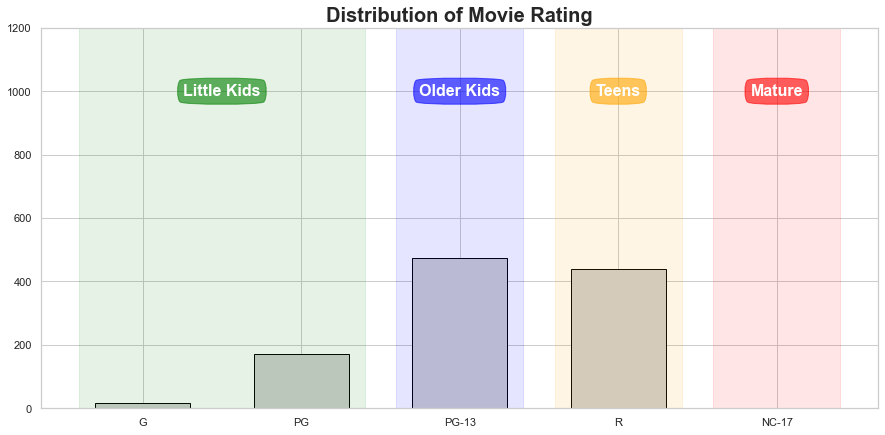

In [602]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, color="#d0d0d0", width=0.6, edgecolor='black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 1], [2, 2], [3, 3], [4, 4]]  # Adjusted span_range for 0-4 rating

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2, height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
    
movie_rating = content_rating_clean_df['content_rating'].value_counts()
rating_order = [label for label in ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA'] if label in movie_rating.index]

rating_barplot(movie_rating[rating_order], "Movie", 1000, 1200)


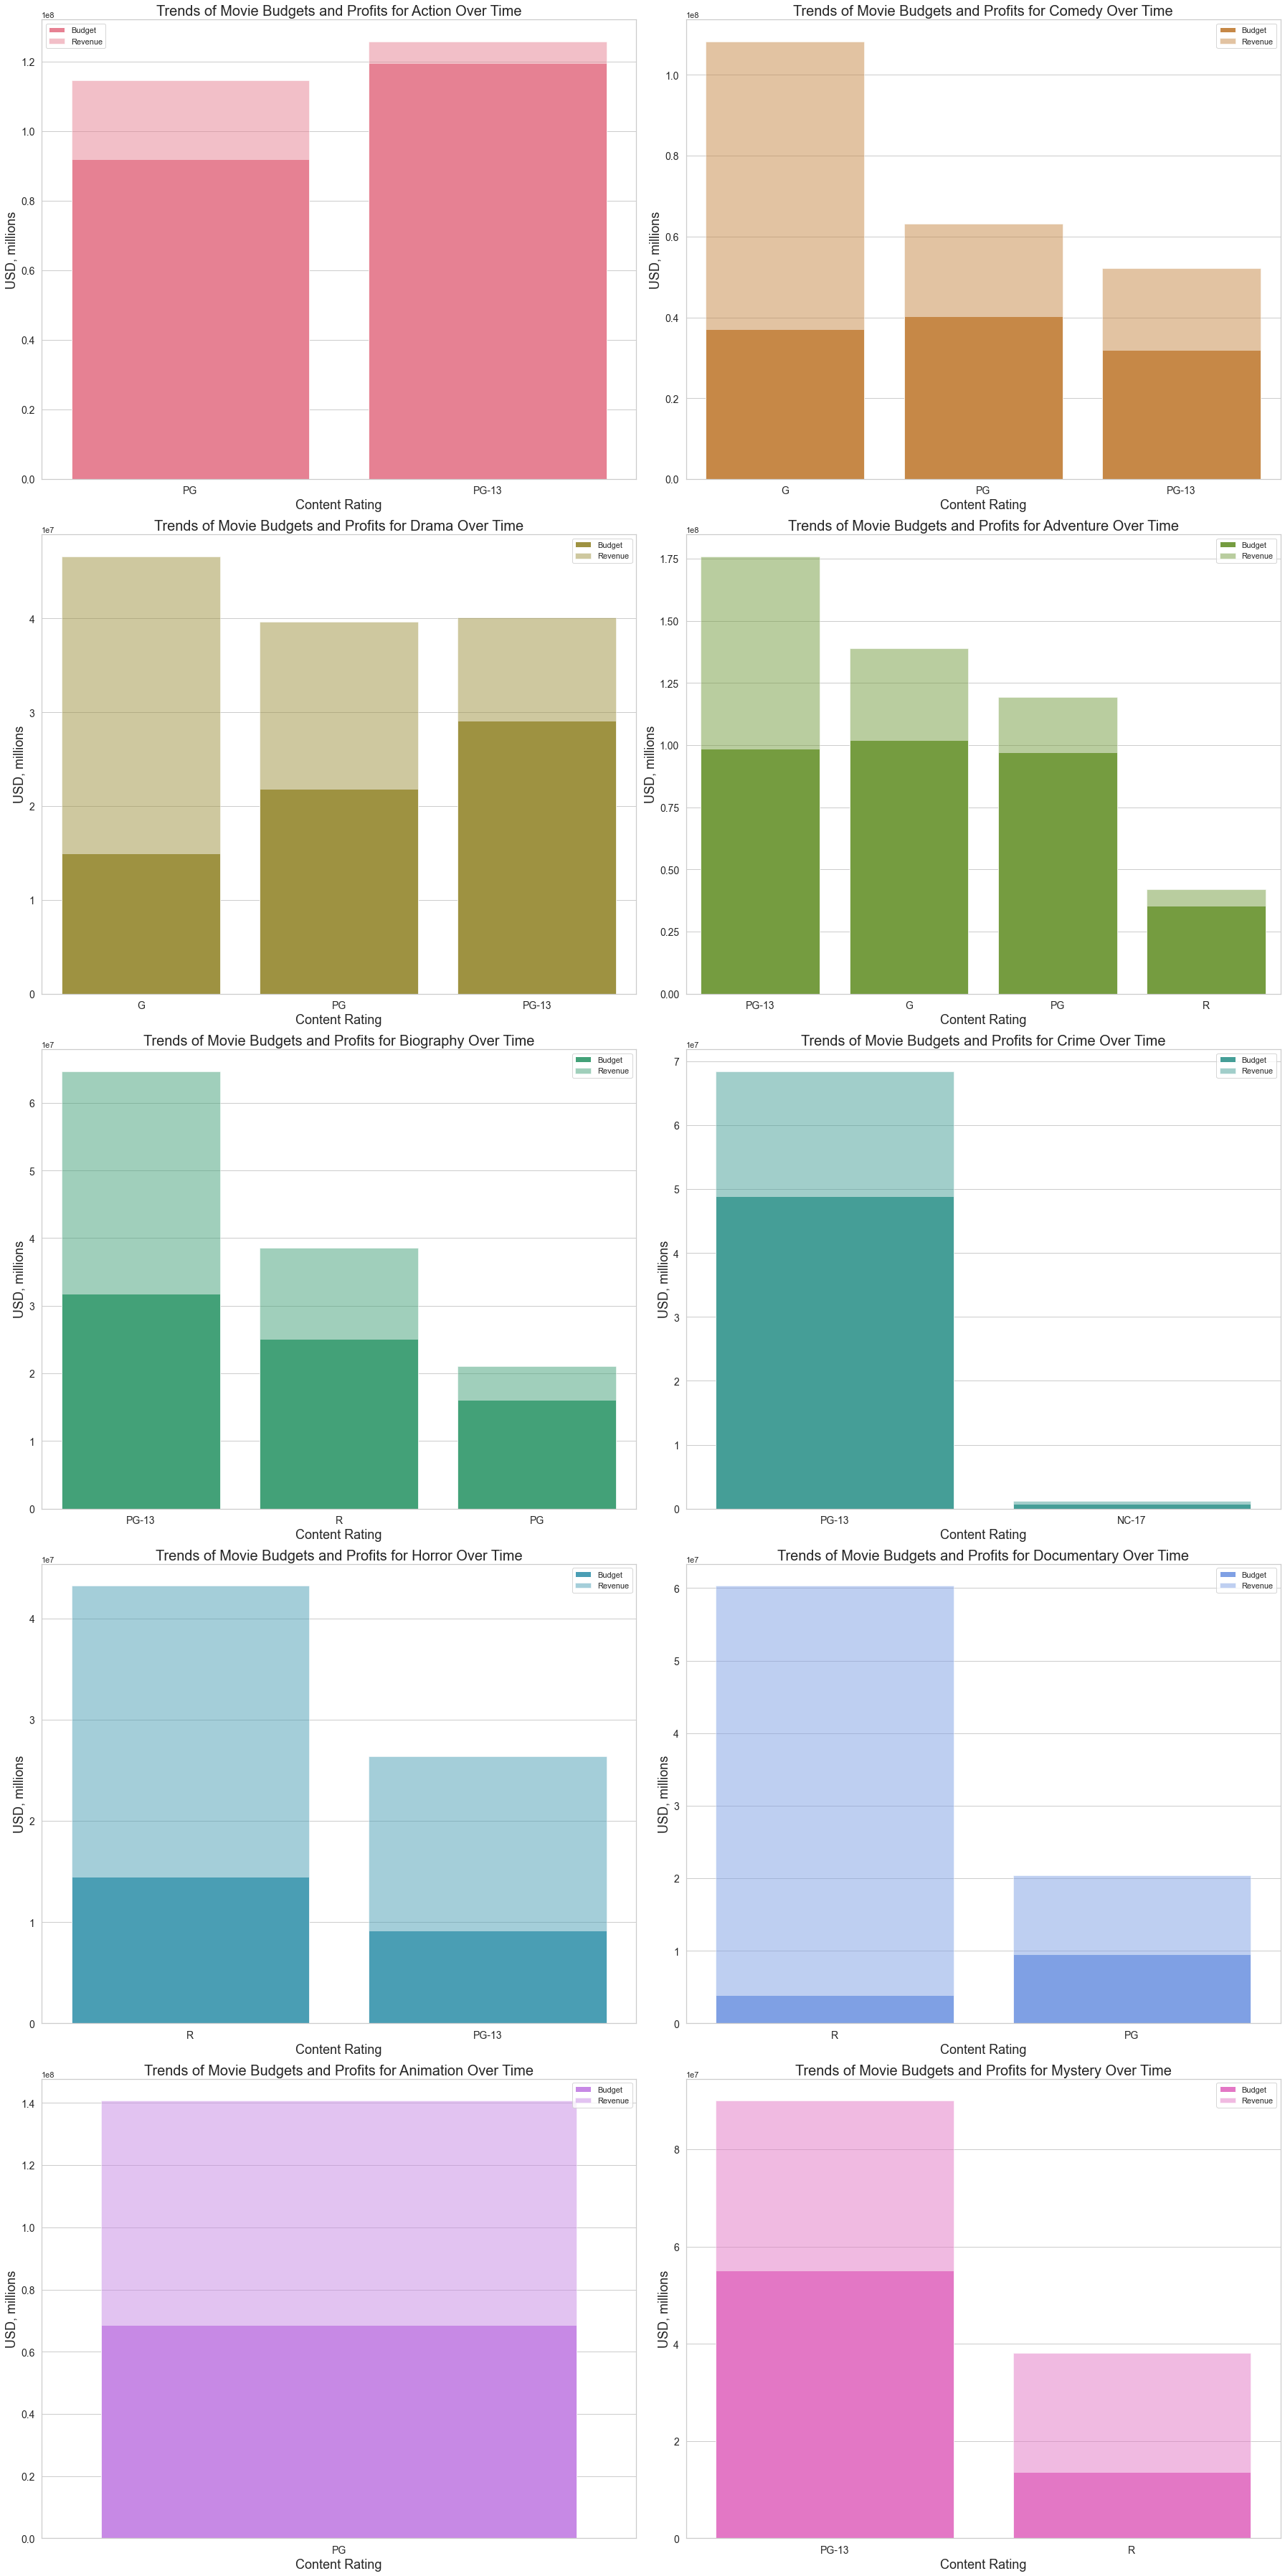

In [642]:
# Set up subplots
num_rows = 5
fig, axes = plt.subplots(num_rows, 2, figsize=(25, 10 * num_rows))
palette = sns.color_palette("husl", n_colors=10)

# Group by genre and content rating, then calculate the mean of gross and budget
grouped_data = content_rating_clean_df.groupby(['genre1', 'content_rating']).agg({
    'gross': 'mean',
    'budget': 'mean',
    'net_profit' : 'mean'
}).reset_index()

# Plot each genre
for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = grouped_data[grouped_data['genre1'] == genre].sort_values(by='net_profit',ascending=False)
    genre_data = genre_data[genre_data['net_profit']>0]
    # Plot data
    sns.barplot(data=genre_data, x='content_rating', y='budget', ax=ax, label='Budget', color=color)
    sns.barplot(data=genre_data, x='content_rating', y='gross', ax=ax, label='Revenue', color=color, alpha=0.5)
    
    # Set title and labels
    ax.set_title(f'Trends of Movie Budgets and Profits for {genre} Over Time', fontsize=20)
    ax.set_xlabel('Content Rating', fontsize=18)
    ax.set_ylabel('USD, millions', fontsize=18)
    ax.tick_params(axis='x', labelsize=14)  # Adjust x-axis tick font size
    ax.tick_params(axis='y', labelsize=14)  # Adjust y-axis tick font size
    
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [760]:
# Group by both 'genre1' and 'content_rating' and calculate the sum of 'net_profit_usd_mil' for each group
profitable_cr = content_rating_clean_df.groupby(['genre1', 'content_rating'])['net_profit'].sum().reset_index()

# Sort the DataFrame by 'genre1' and 'net_profit_usd_mil' in descending order
sorted_profitable_cr = profitable_cr.sort_values(by=['genre1', 'net_profit'], ascending=[True, False])

# Select the top three profitable content ratings for each genre
top_three_cr = sorted_profitable_cr.groupby('genre1').head(3)
top_three_cr = top_three_cr[top_three_cr['net_profit']>0]

# Aggregate the top three months into a single string for each genre
top_three_cr_agg = top_three_cr.groupby('genre1')['content_rating'].apply(lambda x: ', '.join(x)).copy()

# Now you can add this information to your aggregated table genre_table
genre_table['top3_content_rating'] = top_three_cr_agg
genre_table

,total_votes,avg_rating,net_profit_usd_mil,budget_usd_mil,duration_min,top3_months,top3_content_rating
genre1,,,,,,,
Action,170645.174664,6.375048,15.811429,7.857618,114.489443,"May, June, July","PG-13, PG"
Adventure,139611.044444,6.474444,21.393020,8.302250,103.111111,"November, July, June","PG-13, PG, G"
Animation,78878.428571,6.778571,15.138623,4.246429,94.214286,"September, December, July",PG
Biography,97395.624000,7.015200,5.140996,2.519440,119.856000,"November, December, October","PG-13, R, PG"
Comedy,76328.544554,6.112871,5.074057,2.888891,105.953795,"May, December, June","PG-13, PG, G"
Crime,104668.272727,6.347727,4.417093,2.695625,110.852273,"September, June, November","PG-13, NC-17"
Documentary,9996.750000,6.743750,2.591127,1.735625,98.312500,"February, October, August","R, PG"
Drama,91029.440678,6.549576,5.565997,2.826691,114.444915,"February, March, December","PG-13, PG, G"
Horror,63535.333333,5.513725,6.578637,2.060392,98.666667,"September, August, October","R, PG-13"


## 4.6. Critically Acclaimed Movies.

For the final part of analysis, we'll work with `TMDB5000` dataset and two datasets of movie awards.
We'll start with merging movie info (budget, profit) with movie metadata(cast, crew), cleaning the frame, then
adding a number of critically acclaimed cast or crew members to our final dataframe.
We then look at how having a criticaly acclaimed cast or cref affects budget and net profit per genre.

In [689]:
movies_meta_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [688]:
movie_credits_df.head()

,movie_id,title,cast,crew,id
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",19995
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",285
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",206647
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",49026
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",49529


In [681]:
oscars_df.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [682]:
golden_globes_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [684]:
subset_cols = ['id', 'budget', 'genres', 'original_language', 'original_title', \
               'release_date', 'revenue', 'vote_average', 'vote_count', 'runtime'] 
movies_meta_subset_df = movies_meta_df[subset_cols].copy()

In [691]:
#merge dataframes, 
movies_meta_subset_df['id'] = movies_meta_subset_df['id'].astype(str)
movie_credits_df['id'] = movie_credits_df['movie_id'].astype(str)

tmdb_movies_rated_df = pd.merge(movies_meta_subset_df, movie_credits_df, on='id', how='inner')
tmdb_movies_rated_df.loc[tmdb_movies_rated_df['budget'].astype(int) <= 0, 'budget'] = None
tmdb_movies_rated_df.loc[tmdb_movies_rated_df['revenue'] <= 0, 'revenue'] = None
tmdb_movies_rated_df = tmdb_movies_rated_df.drop_duplicates(subset=['id', 'release_date'], keep='first')
tmdb_movies_rated_df.dropna(inplace=True)
tmdb_movies_rated_df.shape

(3229, 14)

In [692]:
#write function to implement above change
import ast

def get_first_n_cast_names(row, n):
    list_of_cast_dicts = ast.literal_eval(row) 
    # Use list comprehension to extract the first n names and join them
    first_n_names = ", ".join(dictionary['name'] for dictionary in list_of_cast_dicts[:n])
    return first_n_names


def get_names_crew(row, jobRole):
    # Convert the string representation of list of dictionaries back to a list of dictionaries
    list_of_crew_dicts = ast.literal_eval(row)
    # Use list comprehension to filter and extract names of crew members with the specified job role
    crew_names = ", ".join(dictionary['name'] for dictionary in list_of_crew_dicts if dictionary.get('job') == jobRole) 
    return crew_names



imdb_movies_rated_df['release_date'] = pd.to_datetime(imdb_movies_rated_df['release_date'])
imdb_movies_rated_df['year'] = imdb_movies_rated_df['release_date'].dt.year.astype(int)
imdb_movies_rated_df['month'] = imdb_movies_rated_df['release_date'].dt.month.astype(int)

y2k_df = imdb_movies_rated_df[imdb_movies_rated_df['year']>=2000].copy()
y2k_df.head()


,id,budget,genres,original_language,original_title,release_date,revenue,vote_average,vote_count,runtime,movie_id,title,cast,crew,year,month
0,19995,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,2009-12-10,2.787965e+09,7.2,11800,162.0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,12
1,285,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,2007-05-19,9.610000e+08,6.9,4500,169.0,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,5
2,206647,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,2015-10-26,8.806746e+08,6.3,4466,148.0,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,10
3,49026,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,2012-07-16,1.084939e+09,7.6,9106,165.0,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012,7
4,49529,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,2012-03-07,2.841391e+08,6.1,2124,132.0,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012,3


In [693]:
# Apply the function to the column containing lists of dictionaries
y2k_df['cast_names'] = y2k_df['cast'].apply(get_first_n_cast_names, args=(10,))

In [694]:
y2k_df['producer'] = y2k_df['crew'].apply(get_names_crew, args=('Producer',))
y2k_df['director'] = y2k_df['crew'].apply(get_names_crew, args=('Director',))
y2k_df['screenplay'] = y2k_df['crew'].apply(get_names_crew, args=('Screenplay',))

In [695]:
y2k_df['genres'] = y2k_df['genres'].apply(get_first_n_cast_names, args=(3,))

In [696]:
#oscars_df['nominee_name'] = oscars_df['nominee'].str.replace(" ", "")
winners_oscar_df = oscars_df[oscars_df['win'] == True]
nominated_oscar_df = oscars_df[oscars_df['win'] == False]

#golden_globes_df['nominee_name'] = golden_globes_df['name'].str.replace(" ", "")
winners_gg_df = golden_globes_df[golden_globes_df['winner'] == True]
nominated_gg_df = golden_globes_df[golden_globes_df['winner'] == False]

# Create a set of names of everyone who won an Oscar or Golden Globe
all_winners_names = pd.concat([winners_gg_df['name'], winners_oscar_df['nominee']])
all_winners_set = set(all_winners_names)

# Create a set of names of everyone who got nominated an Oscar or Golden Globe
all_nominated_names = pd.concat([nominated_gg_df['name'], nominated_oscar_df['nominee']])
# Create a set of all winner names
all_nominated_set = set(all_nominated_names)

In [697]:
def check_nominated_characters(names_string, awards_list):
    name_list = [name.strip() for name in names_string.split(',')]
    award_count = 0;
    for n in name_list:
        if n in awards_list:
            award_count += 1
    return award_count

In [698]:
y2k_df['cast_nominated'] = y2k_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))
y2k_df['cast_awarded'] = y2k_df['cast_names'].apply(check_nominated_characters, args=(all_winners_set,))
# Apply the function to the 'actors_column' and create a new column indicating whether any actor is nominated

In [743]:
# Check if crew members were nominated or awarded
y2k_df['producer_nominated'] = y2k_df['producer'].apply(check_nominated_characters, args=(all_nominated_set,))
y2k_df['director_nominated'] = y2k_df['director'].apply(check_nominated_characters, args=(all_nominated_set,))
y2k_df['screenplay_nominated'] = y2k_df['screenplay'].apply(check_nominated_characters, args=(all_nominated_set,))

# Check if each cast member was awarded
y2k_df['producer_awarded'] = y2k_df['producer'].apply(check_nominated_characters, args=(all_winners_set,))
y2k_df['director_awarded'] = y2k_df['director'].apply(check_nominated_characters, args=(all_winners_set,))
y2k_df['screenplay_awarded'] = y2k_df['screenplay'].apply(check_nominated_characters, args=(all_winners_set,))

# Split the genres column by comma and expand it into two separate columns
genre_split = y2k_df['genres'].str.split(',', expand=True)

# Assign the first two columns of the genre_split DataFrame to new columns in df
y2k_df['genre1'] = genre_split[0].str.strip(' ').copy()
# If the genre_split DataFrame has less than two columns, fill NaN in genre2 column
if len(genre_split.columns) < 2:
    y2k_df['genre2'] = ''
else:
    y2k_df['genre2'] = genre_split[1].str.strip(' ').copy()

columns_to_keep = ['budget', 'revenue', 'genre1', 'genre2', 'original_title', \
                   'vote_average', 'vote_count', 'runtime',
                   'year','month', 'cast_nominated', 'cast_awarded', \
                   'producer_nominated', 'producer_awarded', \
                  'director_nominated', 'director_awarded', \
                  'screenplay_nominated', 'screenplay_awarded']

movies_budget_cast = y2k_df[columns_to_keep].copy()
movies_budget_cast.loc[:, 'budget'] = movies_budget_cast['budget']/1e+07
movies_budget_cast.loc[:, 'revenue'] = movies_budget_cast['revenue']/1e+07

movies_budget_cast.loc[:, 'net_profit'] = movies_budget_cast['revenue'] - movies_budget_cast['budget']
movies_budget_cast.loc[:, 'roi_pct'] = 100*movies_budget_cast['net_profit']/movies_budget_cast['budget']

movies_budget_cast.head()

,budget,revenue,genre1,genre2,original_title,vote_average,vote_count,runtime,year,month,cast_nominated,cast_awarded,producer_nominated,producer_awarded,director_nominated,director_awarded,screenplay_nominated,screenplay_awarded,net_profit,roi_pct
0,23.7,278.796509,Action,Adventure,Avatar,7.2,11800,162.0,2009,12,1,1,1,1,1,1,1,1,255.096509,1076.356577
1,30.0,96.100000,Adventure,Fantasy,Pirates of the Caribbean: At World's End,6.9,4500,169.0,2007,5,4,4,0,0,0,1,0,0,66.100000,220.333333
2,24.5,88.067461,Action,Adventure,Spectre,6.3,4466,148.0,2015,10,5,2,0,0,1,1,1,0,63.567461,259.459024
3,25.0,108.493910,Action,Crime,The Dark Knight Rises,7.6,9106,165.0,2012,7,9,7,1,1,1,1,1,1,83.493910,333.975640
4,26.0,28.413910,Action,Adventure,John Carter,6.1,2124,132.0,2012,3,6,2,0,0,0,1,0,1,2.413910,9.284269


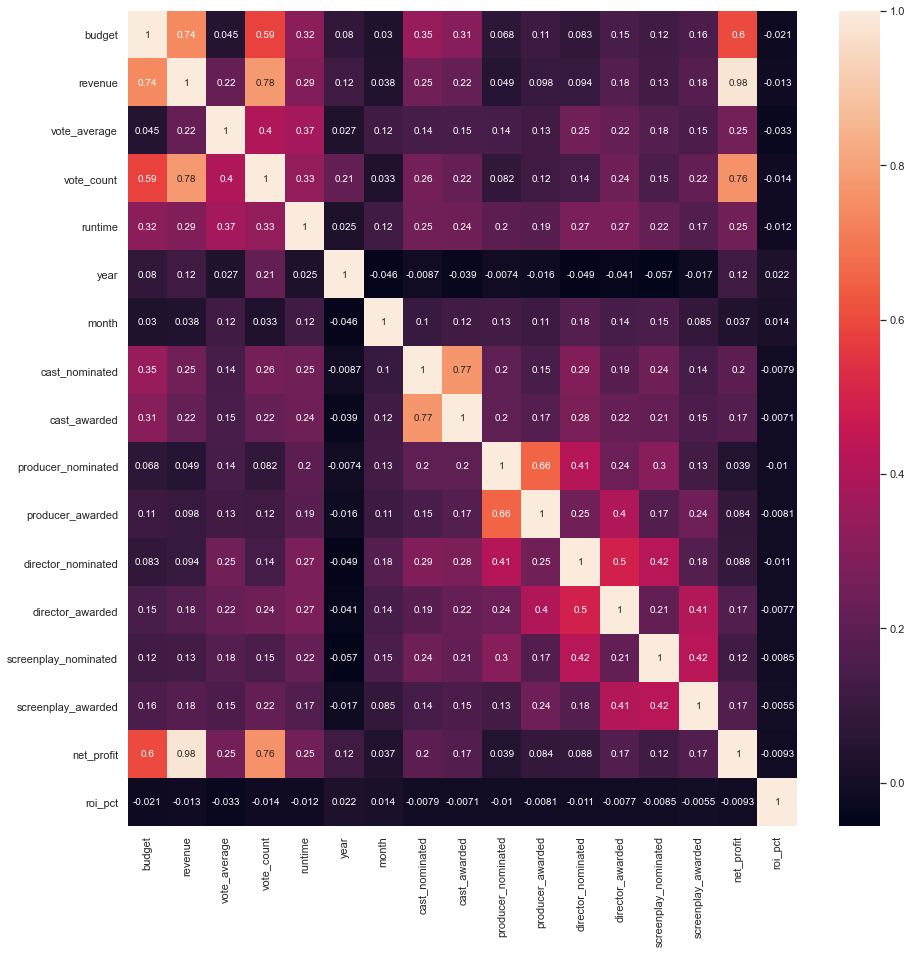

In [744]:
# Correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(movies_budget_cast.corr(),annot=True, );

In [745]:
movies_budget_cast['total_nominations'] = movies_budget_cast['cast_nominated'] + \
    movies_budget_cast['producer_nominated'] + \
    movies_budget_cast['director_nominated'] + \
    movies_budget_cast['screenplay_nominated']


In [749]:
movies_budget_cast['total_awards'] = movies_budget_cast['cast_awarded'] + \
                                     movies_budget_cast['producer_awarded'] + \
                                     movies_budget_cast['director_awarded'] + \
                                     movies_budget_cast['screenplay_awarded']
movies_budget_cast.head()


,budget,revenue,genre1,genre2,original_title,vote_average,vote_count,runtime,year,month,...,producer_nominated,producer_awarded,director_nominated,director_awarded,screenplay_nominated,screenplay_awarded,net_profit,roi_pct,total_nominations,total_awards
0,23.7,278.796509,Action,Adventure,Avatar,7.2,11800,162.0,2009,12,...,1,1,1,1,1,1,255.096509,1076.356577,4,4
1,30.0,96.100000,Adventure,Fantasy,Pirates of the Caribbean: At World's End,6.9,4500,169.0,2007,5,...,0,0,0,1,0,0,66.100000,220.333333,4,5
2,24.5,88.067461,Action,Adventure,Spectre,6.3,4466,148.0,2015,10,...,0,0,1,1,1,0,63.567461,259.459024,7,3
3,25.0,108.493910,Action,Crime,The Dark Knight Rises,7.6,9106,165.0,2012,7,...,1,1,1,1,1,1,83.493910,333.975640,12,10
4,26.0,28.413910,Action,Adventure,John Carter,6.1,2124,132.0,2012,3,...,0,0,0,1,0,1,2.413910,9.284269,6,4


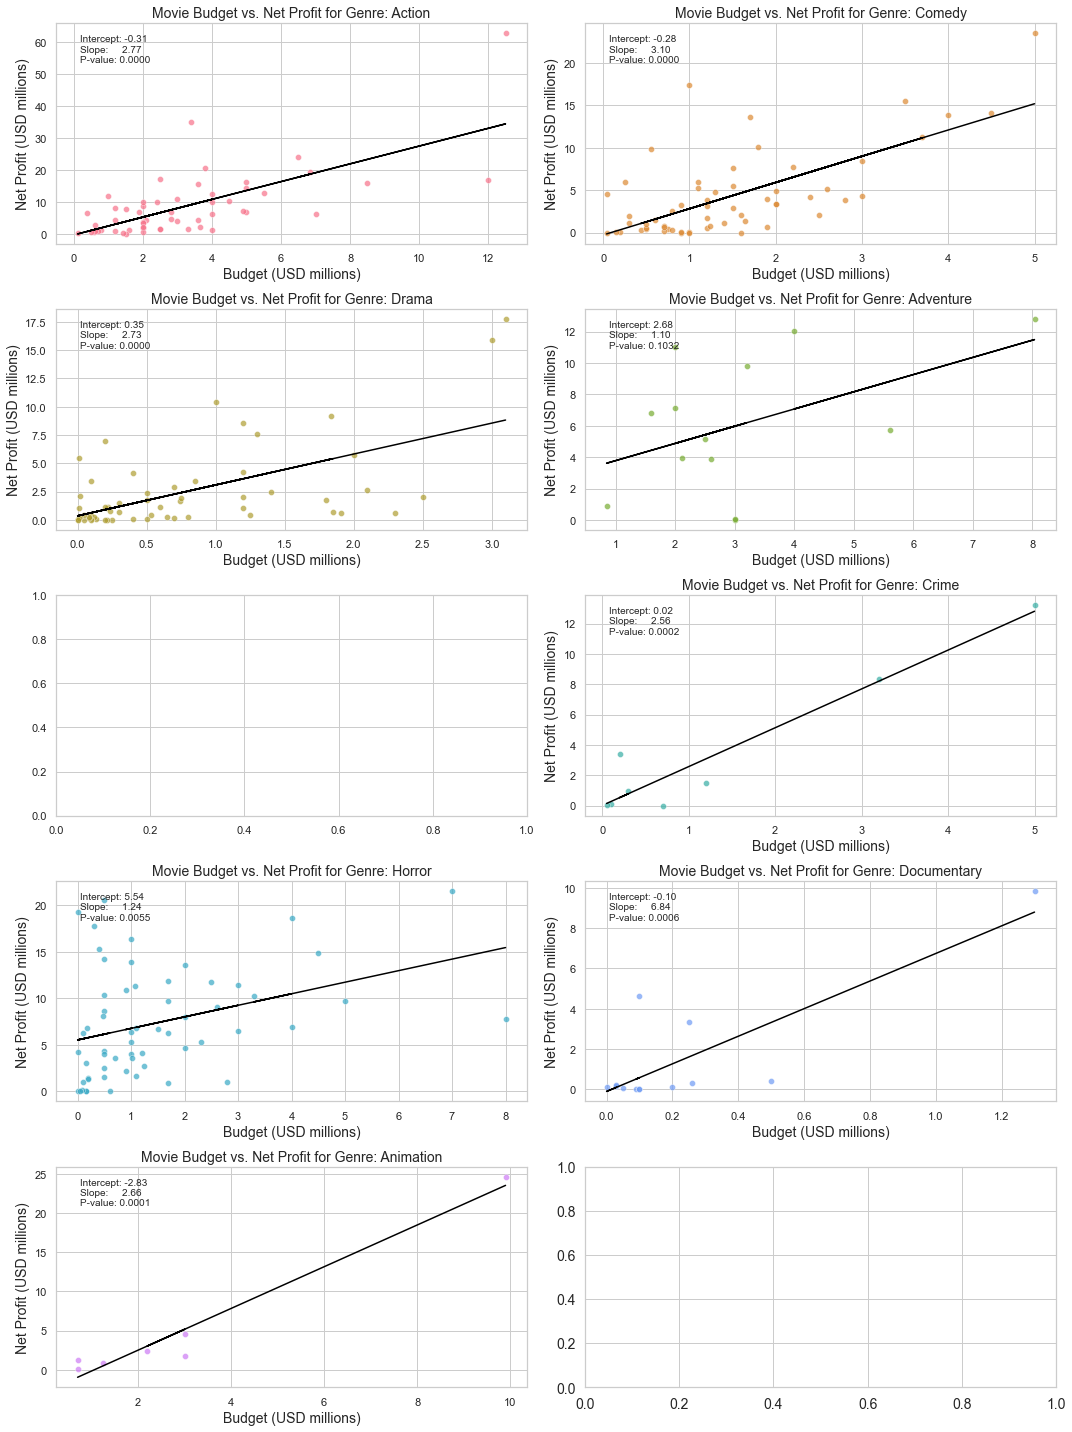

In [840]:
# Get the 10 most represented genres
top_genres = rated_movies_with_budgets_df['genre1'].value_counts().nlargest(10).index

# Generate a color palette with as many colors as there are unique genres
palette = sns.color_palette("husl", n_colors=len(top_genres))

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Iterate over the top genres and create subplots
for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = movies_budget_cast[(movies_budget_cast['genre1'] == genre) &\
                                   (movies_budget_cast['total_nominations'] ==0)]
    if (genre_data.shape[0]<5):
        continue
    
    X = sm.add_constant(genre_data["budget"])  # Add constant term for the intercept
    y = genre_data["revenue"]
    
    # Fit a linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
    genre_table.at[genre, 'expected_ret_no_nom'] = results.params.budget

    # Create the scatter plot for the current genre with the assigned color
    sns.scatterplot(data=genre_data, x="budget", y="revenue", alpha=0.7, color=color, ax=ax)

    # Add the regression line for the current genre
    ax.plot(genre_data["budget"], results.predict(X), color="black")

    # Add model parameters and p-values as text
    ax.text(0.05, 0.95, f"Intercept: {results.params['const']:.2f}\nSlope: \
    {results.params['budget']:.2f}\nP-value: {results.pvalues['budget']:.4f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top')

    ax.set_title(f"Movie Budget vs. Net Profit for Genre: {genre}", fontsize=14)
    ax.set_xlabel("Budget (USD millions)", fontsize=14)
    ax.set_ylabel("Net Profit (USD millions)", fontsize=14)
    ax.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()

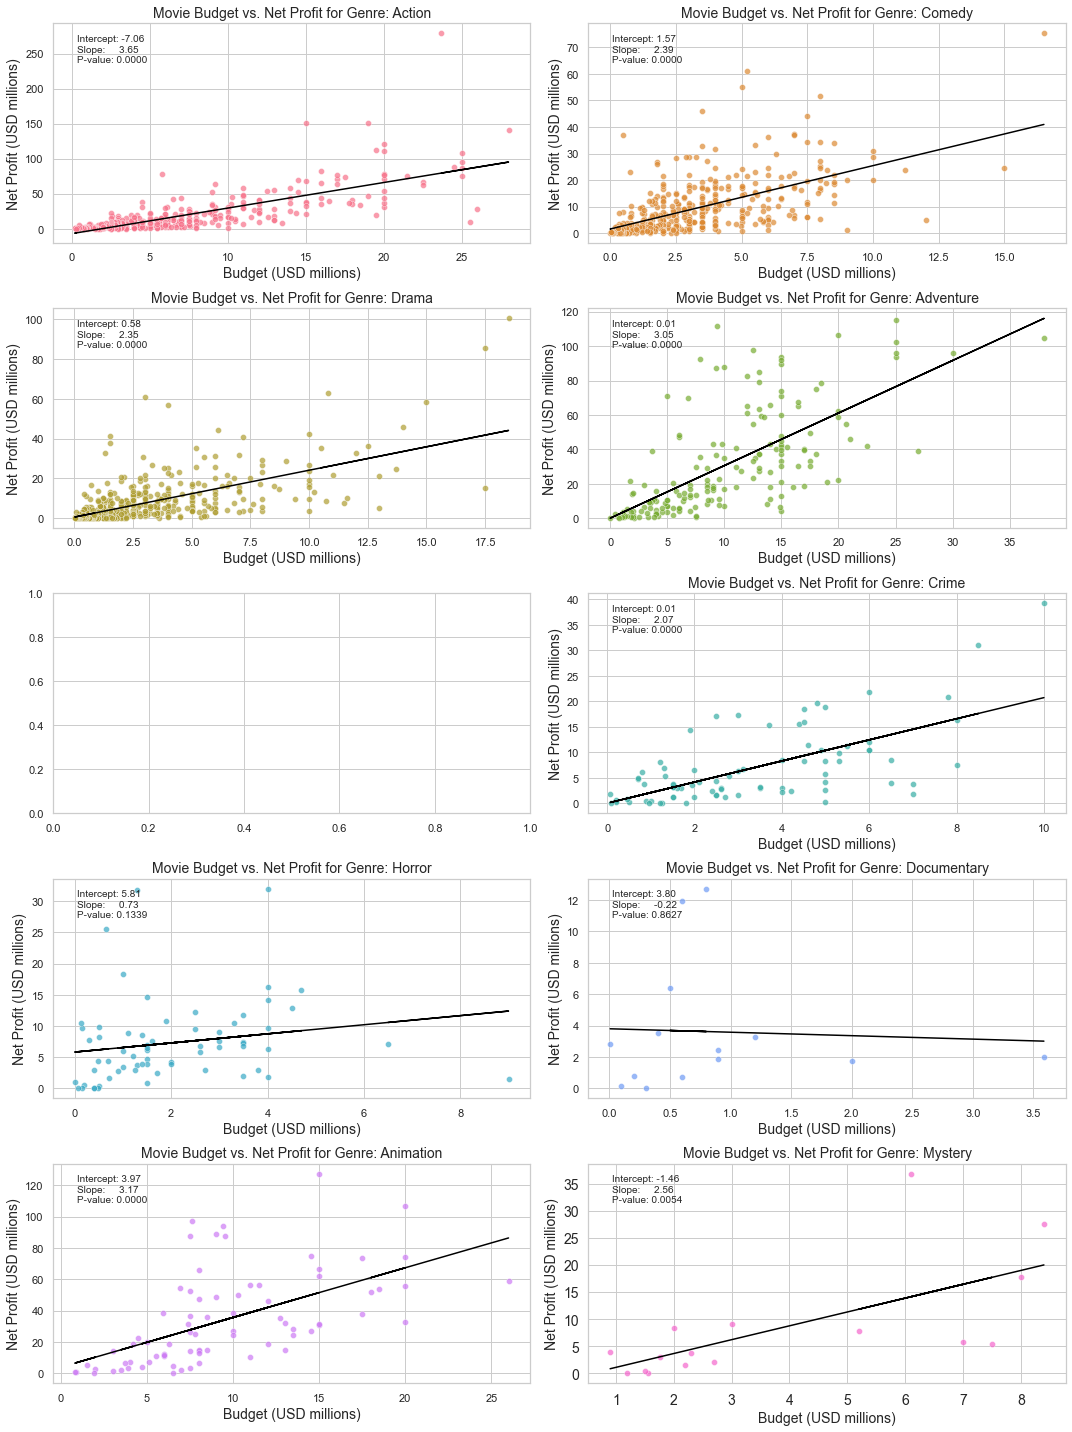

In [841]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Iterate over the top genres and create subplots
for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = movies_budget_cast[(movies_budget_cast['genre1'] == genre) &\
                                   (movies_budget_cast['total_nominations'] >0)]
    if (genre_data.shape[0]<5):
        continue
    
    X = sm.add_constant(genre_data["budget"])  # Add constant term for the intercept
    y = genre_data["revenue"]
    
    # Fit a linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
    genre_table.at[genre, 'expected_ret_nom'] = results.params.budget

    # Create the scatter plot for the current genre with the assigned color
    sns.scatterplot(data=genre_data, x="budget", y="revenue", alpha=0.7, color=color, ax=ax)

    # Add the regression line for the current genre
    ax.plot(genre_data["budget"], results.predict(X), color="black")

    # Add model parameters and p-values as text
    ax.text(0.05, 0.95, f"Intercept: {results.params['const']:.2f}\nSlope: \
    {results.params['budget']:.2f}\nP-value: {results.pvalues['budget']:.4f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top')

    ax.set_title(f"Movie Budget vs. Net Profit for Genre: {genre}", fontsize=14)
    ax.set_xlabel("Budget (USD millions)", fontsize=14)
    ax.set_ylabel("Net Profit (USD millions)", fontsize=14)
    ax.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()

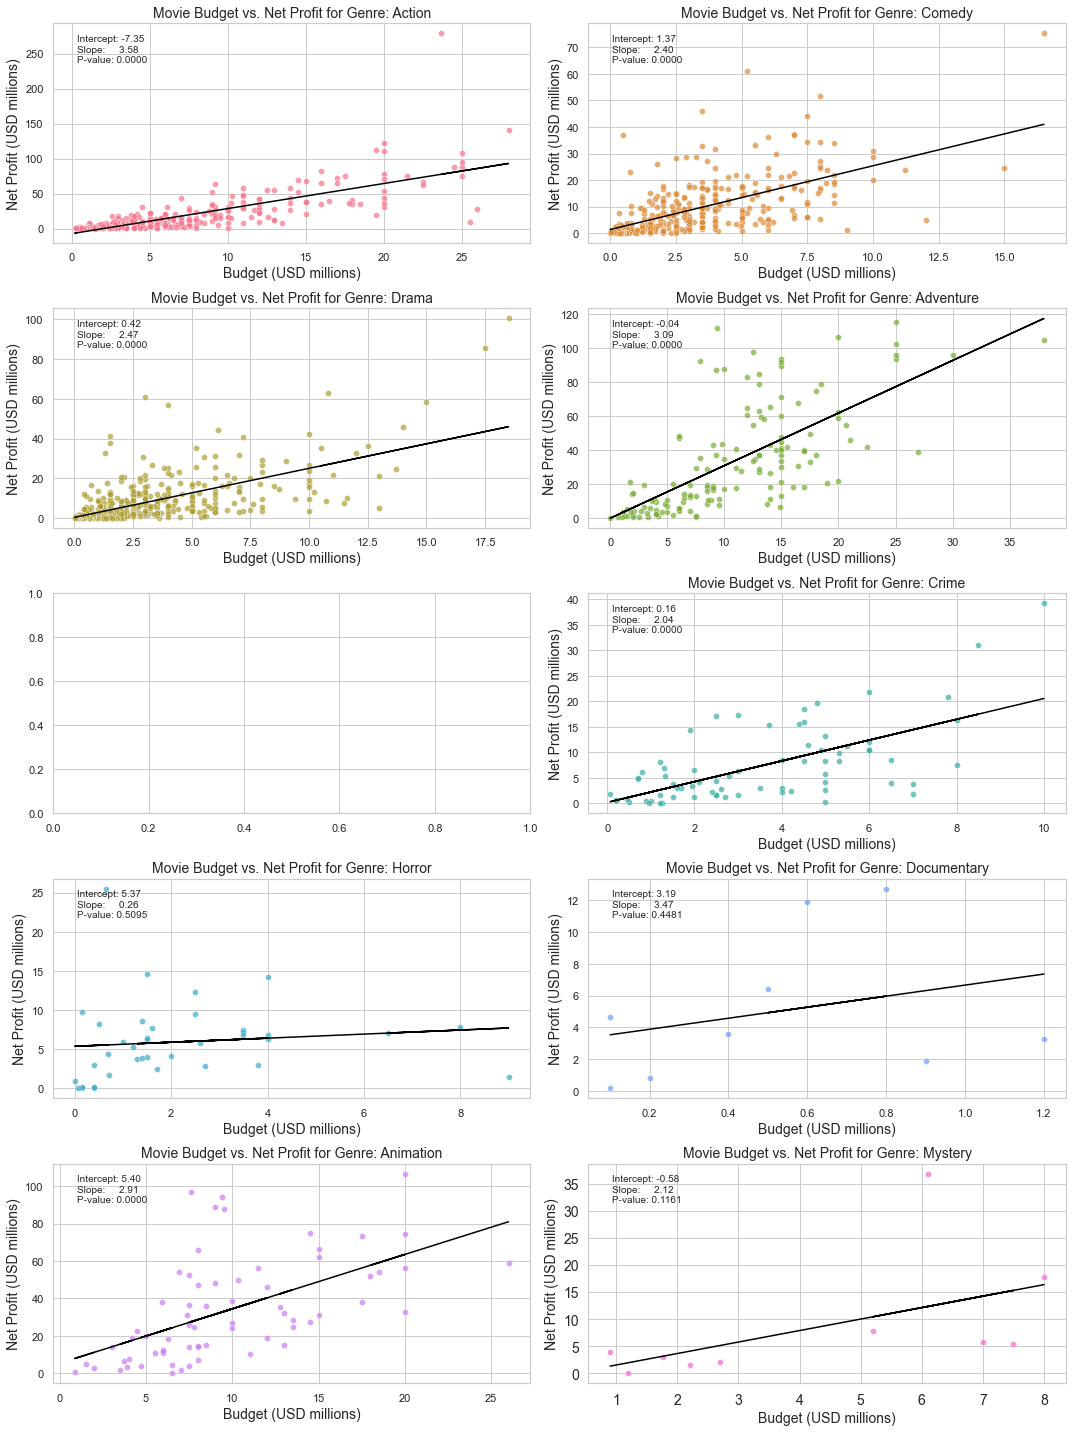

In [842]:
# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Iterate over the top genres and create subplots
for genre, color, ax in zip(top_genres, palette, axes.flatten()):
    # Filter data for the current genre
    genre_data = movies_budget_cast[(movies_budget_cast['genre1'] == genre) &\
                                   (movies_budget_cast['total_awards'] > 0)]
    if (genre_data.shape[0]<5):
        continue
    
    X = sm.add_constant(genre_data["budget"])  # Add constant term for the intercept
    y = genre_data["revenue"]
    
    # Fit a linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
    genre_table.at[genre, 'expected_ret_awards'] = results.params.budget

    # Create the scatter plot for the current genre with the assigned color
    sns.scatterplot(data=genre_data, x="budget", y="revenue", alpha=0.7, color=color, ax=ax)

    # Add the regression line for the current genre
    ax.plot(genre_data["budget"], results.predict(X), color="black")

    # Add model parameters and p-values as text
    ax.text(0.05, 0.95, f"Intercept: {results.params['const']:.2f}\nSlope: \
    {results.params['budget']:.2f}\nP-value: {results.pvalues['budget']:.4f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top')

    ax.set_title(f"Movie Budget vs. Net Profit for Genre: {genre}", fontsize=14)
    ax.set_xlabel("Budget (USD millions)", fontsize=14)
    ax.set_ylabel("Net Profit (USD millions)", fontsize=14)
    ax.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()

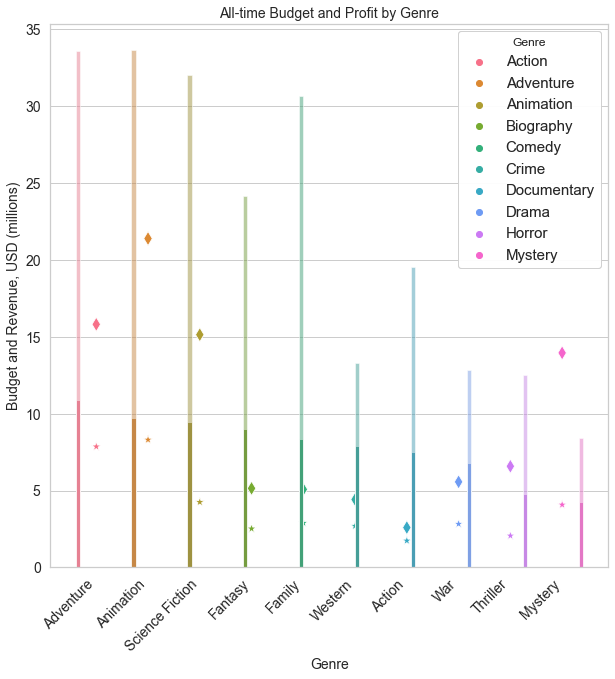

In [819]:
# Budgets and gross profits by genres
awarded_movies = movies_budget_cast[movies_budget_cast['total_awards'] > 0]
grouped_by_genre = awarded_movies.groupby('genre1').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Sort the DataFrame by total budget and total profit in ascending order
grouped_by_genre_sorted = grouped_by_genre.sort_values(by=['budget', 'revenue'], ascending=[False, False])
# Calculate average rating for each genre

# Select top 10 genres 
top_10_genres = grouped_by_genre_sorted.head(10)
palette = sns.color_palette("husl", n_colors=len(top_10_genres))

# Plot the genres with the lowest budgets and highest profits
plt.figure(figsize=(10, 10))
bar = sns.barplot(x='genre1', y='budget', data=top_10_genres, hue='genre1', \
            palette=palette)

sns.barplot(x='genre1', y='revenue', data=top_10_genres, hue='genre1', \
            palette=palette, alpha=0.5)

# Add scatter points for genre averages
scatter1 = sns.scatterplot(data=genre_table, x=genre_table.index, y='budget_usd_mil', hue='genre1', palette=palette, s=100, marker='*')
scatter2 = sns.scatterplot(data=genre_table, x=genre_table.index, y='net_profit_usd_mil', hue='genre1', palette=palette, s=100, marker='d')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Budget and Revenue, USD (millions)', fontsize=14)
plt.title('All-time Budget and Profit by Genre', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)

#Set legend
# Add legend only for 'gross_usd_mil' data
handles, labels = plt.gca().get_legend_handles_labels()
my_handles = handles[0:10]
my_labels = labels[0:10]
gross_legend = plt.legend(my_handles, my_labels, title='Genre', fontsize=15)
plt.gca().add_artist(gross_legend)

In [847]:
genre_table

,total_votes,avg_rating,net_profit_usd_mil,budget_usd_mil,duration_min,top3_months,top3_content_rating,expected_ret,expected_ret_no_nom,expected_ret_awards,expected_ret_nom
genre1,,,,,,,,,,,
Action,170645.174664,6.375048,15.811429,7.857618,114.489443,"May, June, July","PG-13, PG",2.488926,2.774348,3.581545,3.649403
Adventure,139611.044444,6.474444,21.393020,8.302250,103.111111,"November, July, June","PG-13, PG, G",2.492188,1.096508,3.090353,3.054215
Animation,78878.428571,6.778571,15.138623,4.246429,94.214286,"September, December, July",PG,2.657068,2.661951,2.905812,3.168264
Biography,97395.624000,7.015200,5.140996,2.519440,119.856000,"November, December, October","PG-13, R, PG",2.230163,NaN,NaN,NaN
Comedy,76328.544554,6.112871,5.074057,2.888891,105.953795,"May, December, June","PG-13, PG, G",1.276296,3.096103,2.402209,2.387299
Crime,104668.272727,6.347727,4.417093,2.695625,110.852273,"September, June, November","PG-13, NC-17",3.564454,2.559437,2.038879,2.071563
Documentary,9996.750000,6.743750,2.591127,1.735625,98.312500,"February, October, August","R, PG",1.550689,6.840144,3.474028,-0.219963
Drama,91029.440678,6.549576,5.565997,2.826691,114.444915,"February, March, December","PG-13, PG, G",2.306267,2.733477,2.465130,2.354375
Horror,63535.333333,5.513725,6.578637,2.060392,98.666667,"September, August, October","R, PG-13",1.160734,1.241282,0.259670,0.729463


# Conclusions